In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Exploratory Data Analysis

In [2]:
df_calculated = pd.read_excel('Latest_Processed_Data.xlsx', sheet_name= 'Ratio Data')
df_calculated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Code                                     9188 non-null   object 
 1   Year                                     9188 non-null   int64  
 2   Size                                     9188 non-null   float64
 3   Current Ratio                            9188 non-null   float64
 4   ROA                                      9188 non-null   float64
 5   ROE                                      9188 non-null   float64
 6   Debt on Equity                           9188 non-null   float64
 7   Gross profit margin                      9188 non-null   float64
 8   Operating margin                         9188 non-null   float64
 9   Net profit margin                        9188 non-null   float64
 10  Cost of debt                             9188 no

### Review Availability of Data

Text(0.5, 1.0, 'Quantity of available data')

<Figure size 1500x800 with 0 Axes>

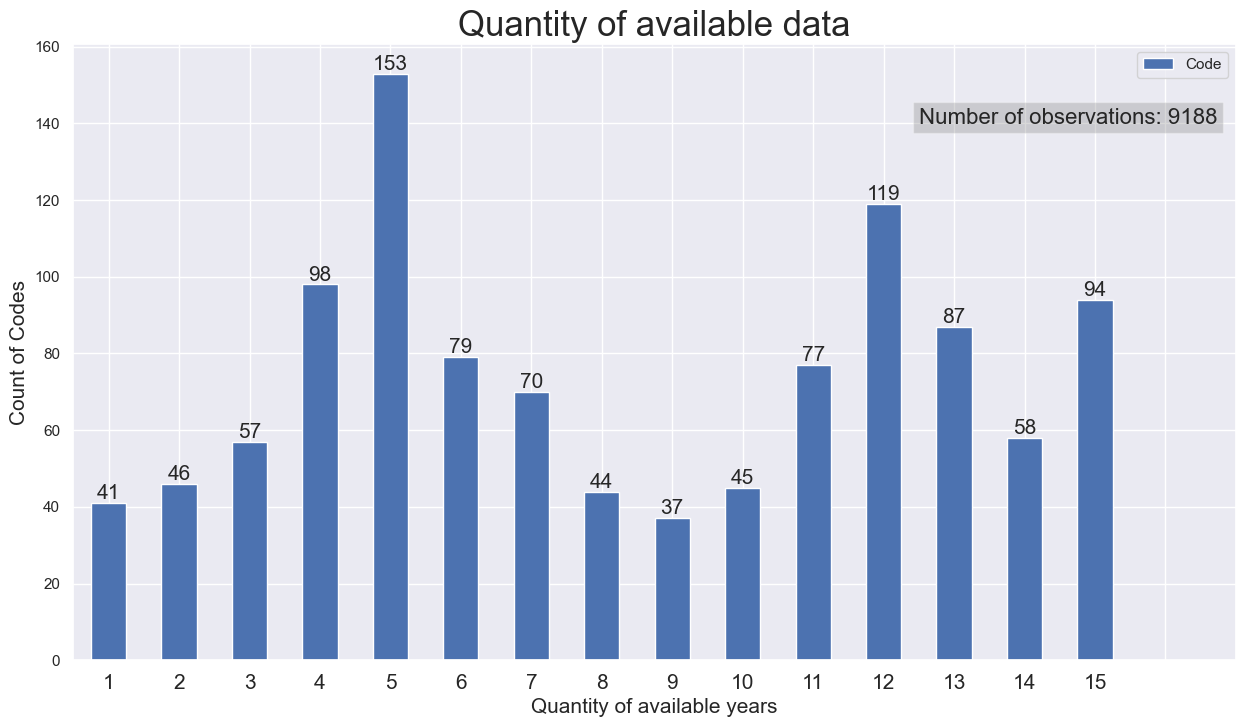

In [3]:
df_check_1 = pd.DataFrame({'Code': list(df_calculated['Code'].unique())})
count_available_year = []
for i in list(df_calculated['Code'].unique()):
   count_available_year.append(len( df_calculated[df_calculated['Code']== i]))
df_check_1['count_of_available_year'] = count_available_year
df_check_gb = df_check_1.groupby(['count_of_available_year']).count()

sns.set(style="darkgrid")
fig = plt.figure(figsize=(15,8))
df_check_viz = df_check_gb.plot.bar( figsize=(15,8), rot = 0)
plt.rcParams['font.size'] = '15'
plt.xticks(np.arange(0, 17, step=1), fontsize = 15)
plt.bar_label(df_check_viz.containers[0])
plt.xlabel('Quantity of available years', fontsize = 15)
plt.ylabel('Count of Codes', fontsize = 15)
plt.text(11.5, 140, f'Number of observations: {len(df_calculated)}', fontsize=16, bbox = dict(facecolor = 'gray', alpha = 0.3))
plt.title('Quantity of available data', fontsize = 25)

## Visualizing the dummy varibles in data 

Text(0.5, 1.0, 'Paying Dividend at least 1 time in 3 latest year')

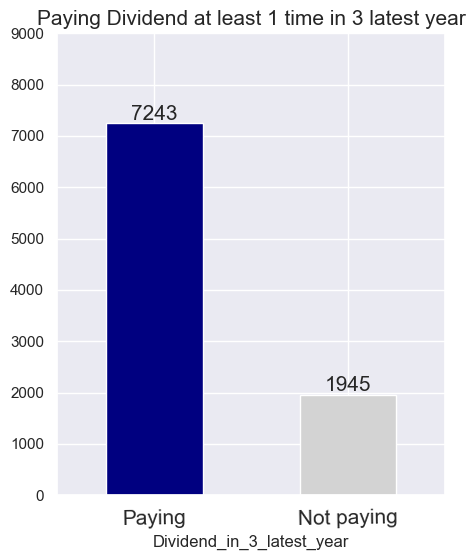

In [4]:
color_list = ['navy', 'lightgrey']
type_count = df_calculated['Dividend_in_3_latest_year'].value_counts()
type_plot = type_count.plot.bar(figsize =(5, 6), rot=1, color= color_list)
type_plot.set_ylim([0,9000])
type_plot.set_xticklabels(['Paying', 'Not paying'], fontdict ={'fontsize':15})
type_plot.bar_label(type_plot.containers[0], fmt='%.0f', fontsize =15)
type_plot.set_title('Paying Dividend at least 1 time in 3 latest year', fontsize = 15)


Text(0.5, 1.0, 'Dividend Policy')

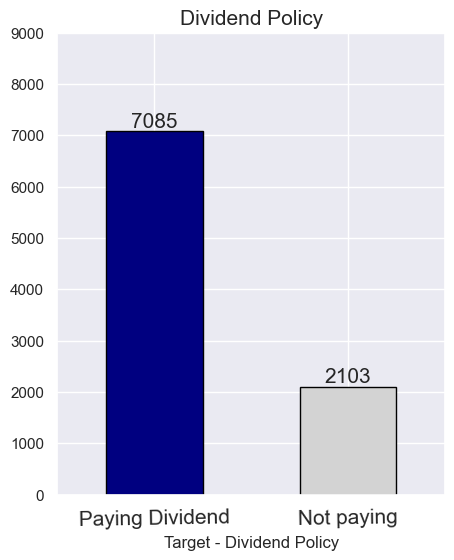

In [5]:
color_list = ['navy', 'lightgrey']
type_count = df_calculated['Target - Dividend Policy'].value_counts()
type_plot = type_count.plot.bar(figsize =(5,6), rot=1, color= color_list, edgecolor = 'black')
type_plot.set_ylim([0,9000])
type_plot.set_xticklabels(['Paying Dividend', 'Not paying'], fontdict ={'fontsize':15})
type_plot.bar_label(type_plot.containers[0], fmt='%.0f', fontsize =15 )
type_plot.set_title('Dividend Policy', fontsize = 15)


### Continuous Independent Varibles Description

In [6]:
df_feature = df_calculated.drop(columns=['Code', 'Year','Dividend_in_3_latest_year', 'Target - Dividend Policy'])
df_feature.describe()

,Size,Current Ratio,ROA,ROE,Debt on Equity,Gross profit margin,Operating margin,Net profit margin,Cost of debt,BVPS,EPS,Price on Book Value,Price on EPS,Price on Operating Cash flow per Share,Cash flow coverage ratio,Operating cash flow ratio,Time interest earned,Retained Earnings (Accumulated Deficit),Cumulative Net Change in Cash,FCF
count,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9.188000e+03,9.188000e+03,9.188000e+03,9188.000000,9188.000000,9.188000e+03,9.188000e+03,9.188000e+03,9.188000e+03
mean,27.291128,2.665442,0.042869,0.091581,2.551241,0.196408,-0.023879,-0.031844,-0.017632,1.518320,0.201198,8.244518e+03,3.414944e+05,3.763785e+04,0.185432,0.266189,-2.869432e+05,2.064921e+11,1.951555e+10,-1.514737e+10
std,1.521758,6.961674,0.293623,2.715866,34.842669,0.477458,2.704682,2.439922,0.290371,1.203216,0.366690,2.086020e+05,5.153657e+06,2.817417e+06,1.870037,2.107827,2.120017e+08,1.564562e+12,4.884876e+11,1.317190e+12
min,20.044110,0.001221,-24.204738,-87.426119,-832.214659,-11.274236,-135.134836,-114.105309,-25.440365,-21.263085,-6.452664,-1.058898e+07,-1.306333e+08,-1.590309e+08,-72.466669,-72.466669,-1.316787e+10,-2.196148e+13,-1.105145e+13,-5.475586e+13
25%,26.260913,1.070699,0.010846,0.033913,0.465267,0.090455,0.012283,0.011930,-0.010982,1.084884,0.037693,3.016973e+03,1.615699e+04,-1.044533e+04,-0.038475,-0.050570,-4.721142e+01,4.262472e+09,-1.267186e+10,-4.368612e+10
50%,27.210564,1.423299,0.040719,0.102030,1.086377,0.162391,0.051504,0.043755,-0.001869,1.368357,0.147944,5.906337e+03,5.100767e+04,1.278550e+04,0.080982,0.112274,-5.519021e+00,2.572187e+10,4.894256e+08,1.783574e+09
75%,28.208299,2.306668,0.084542,0.178081,2.152473,0.277209,0.129010,0.110217,0.000218,1.870393,0.319146,1.089795e+04,1.190128e+05,5.153783e+04,0.292735,0.434877,5.523077e+00,1.059822e+11,1.945717e+10,4.397173e+10
max,33.691042,172.670910,0.783739,186.272419,1819.789825,26.549434,60.914922,52.385143,4.613734,11.624671,5.141119,1.265084e+07,3.058324e+08,1.526768e+08,86.287667,86.287667,9.373102e+09,7.941345e+13,1.458338e+13,4.808144e+13


### Features Distribution Visualization

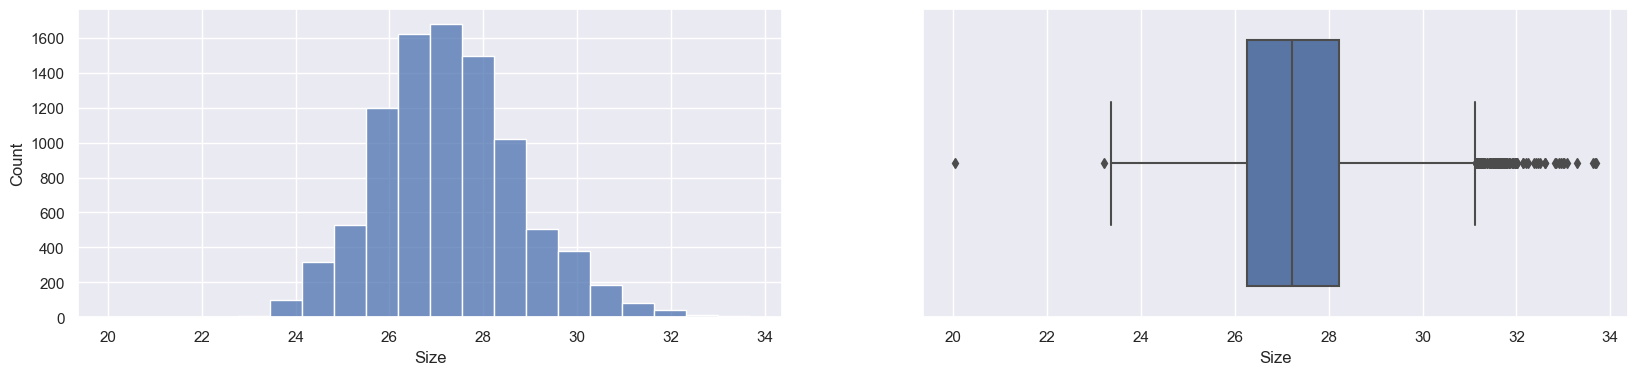

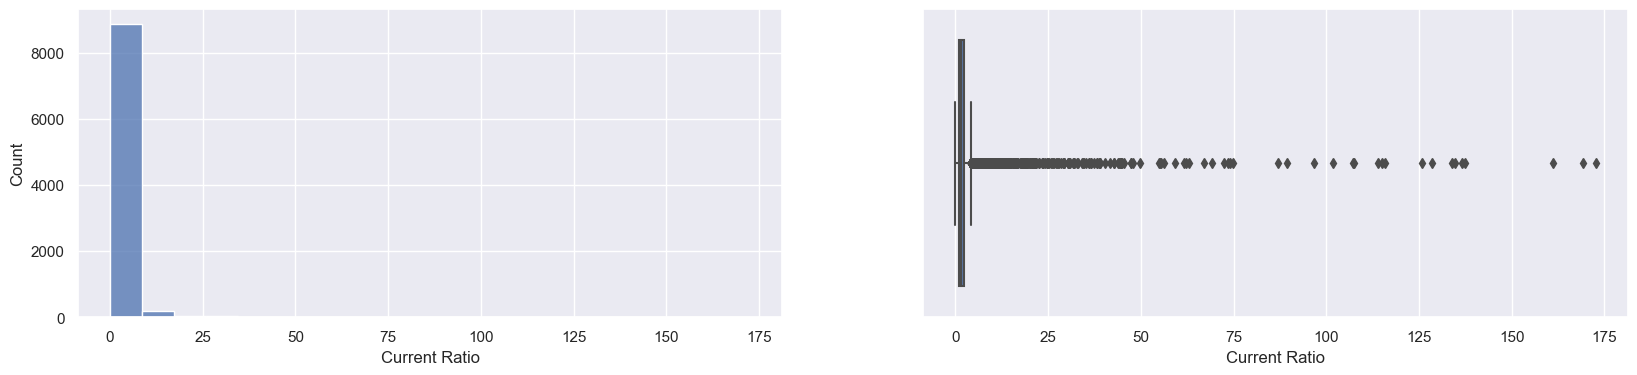

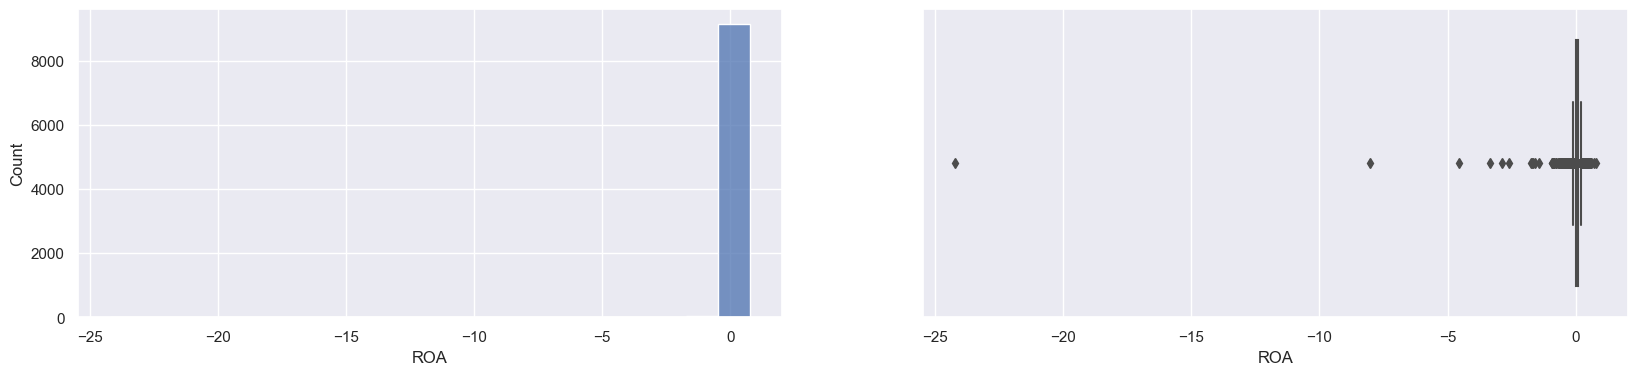

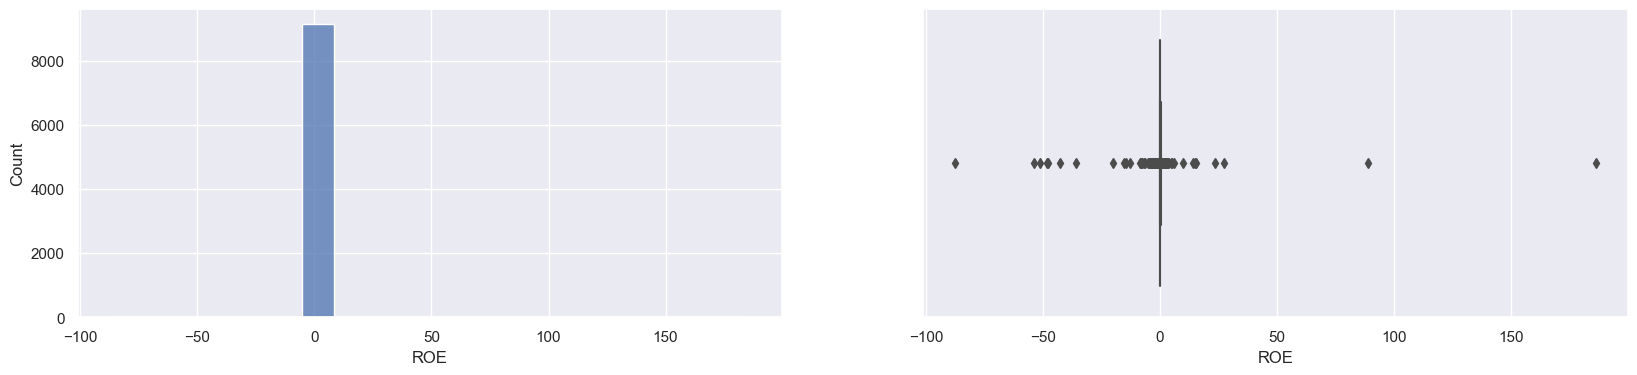

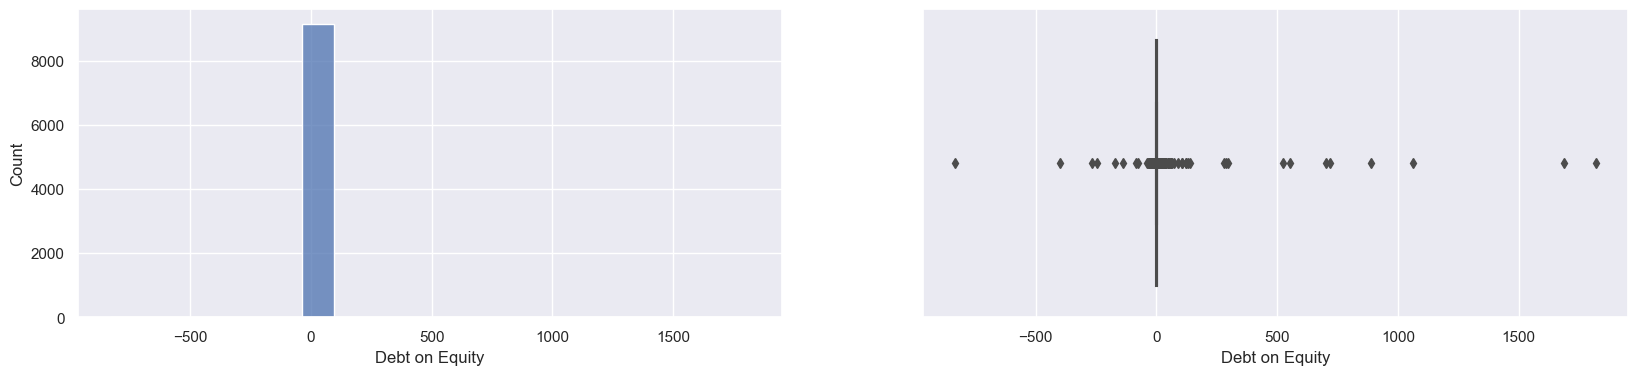

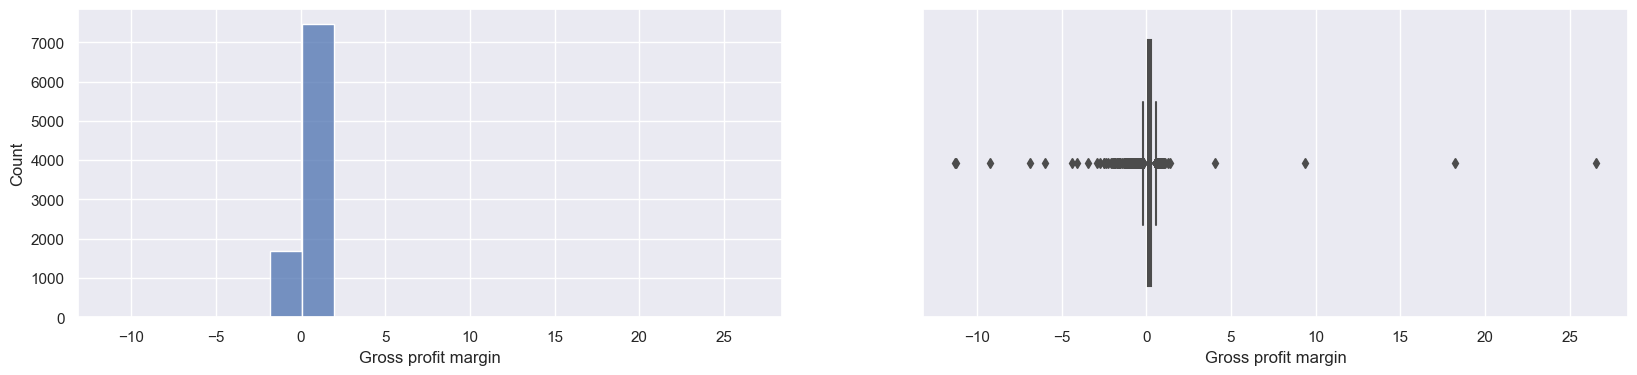

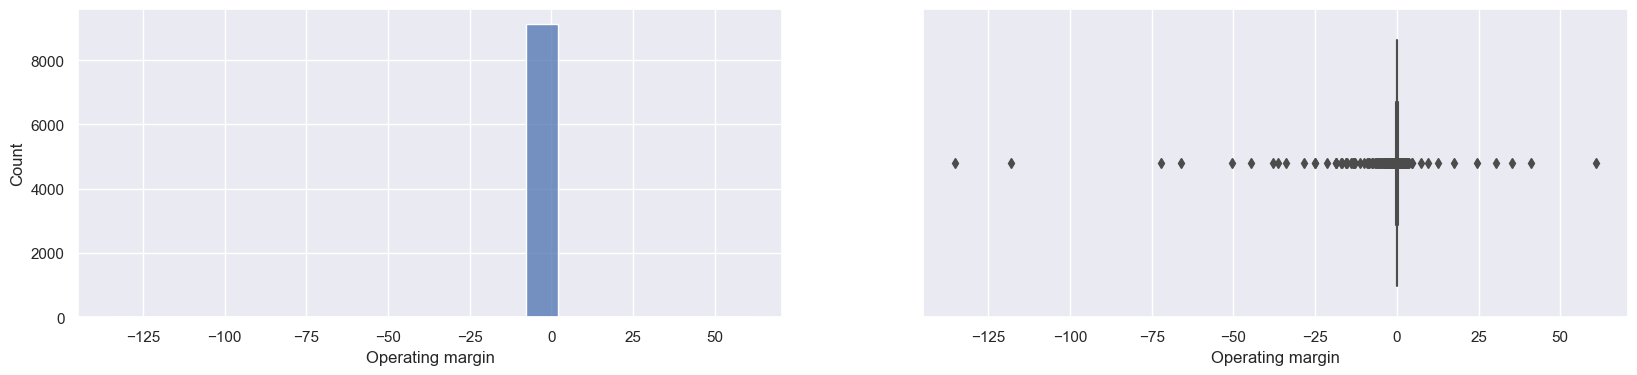

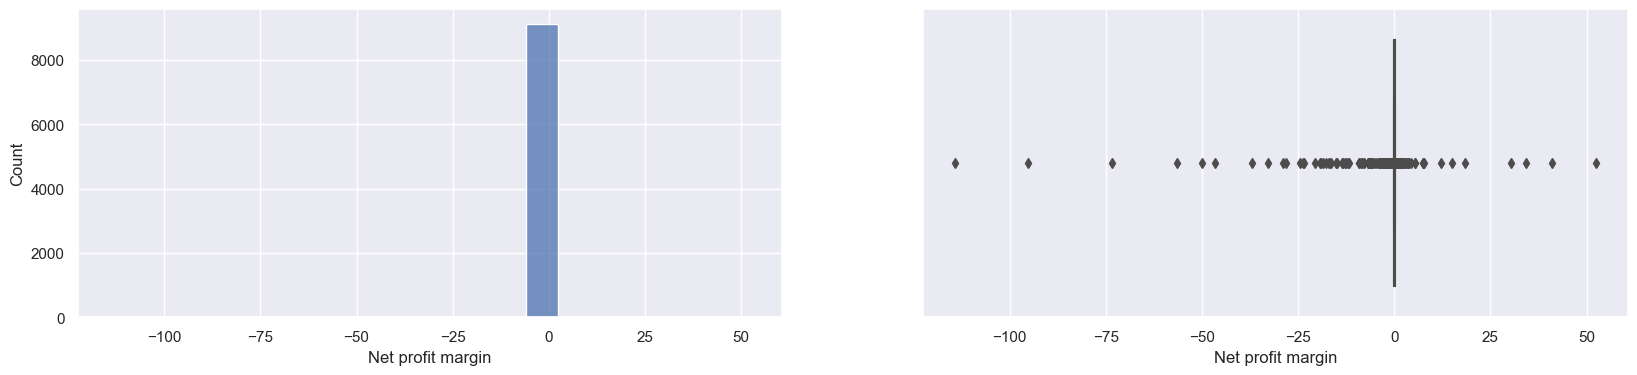

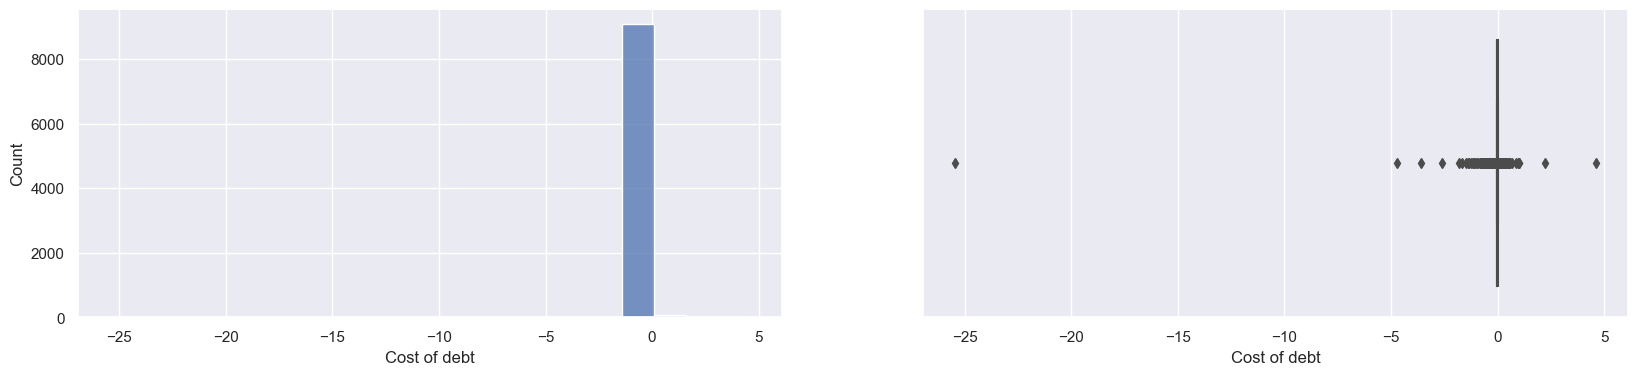

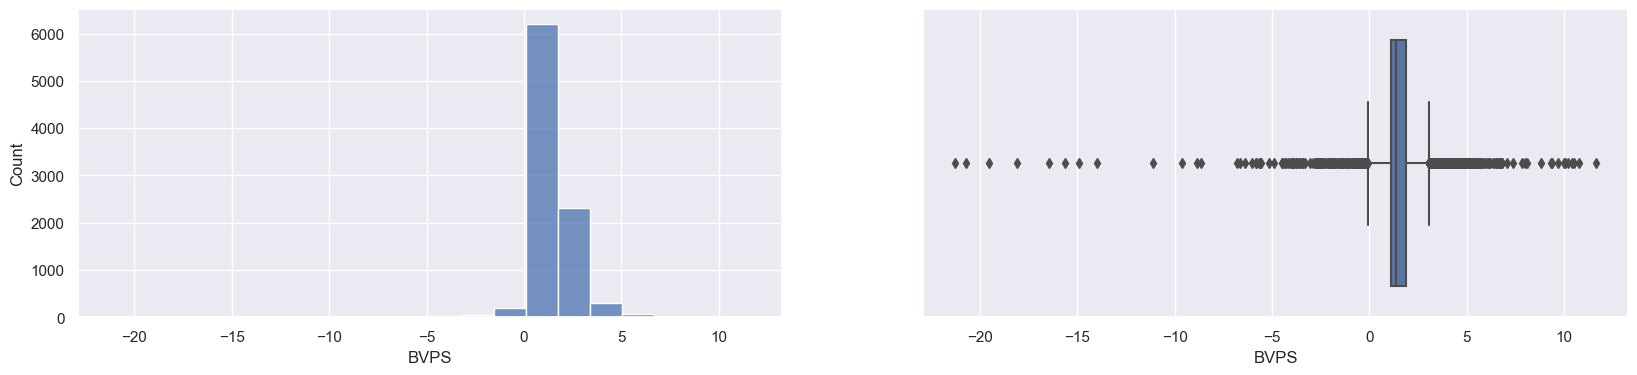

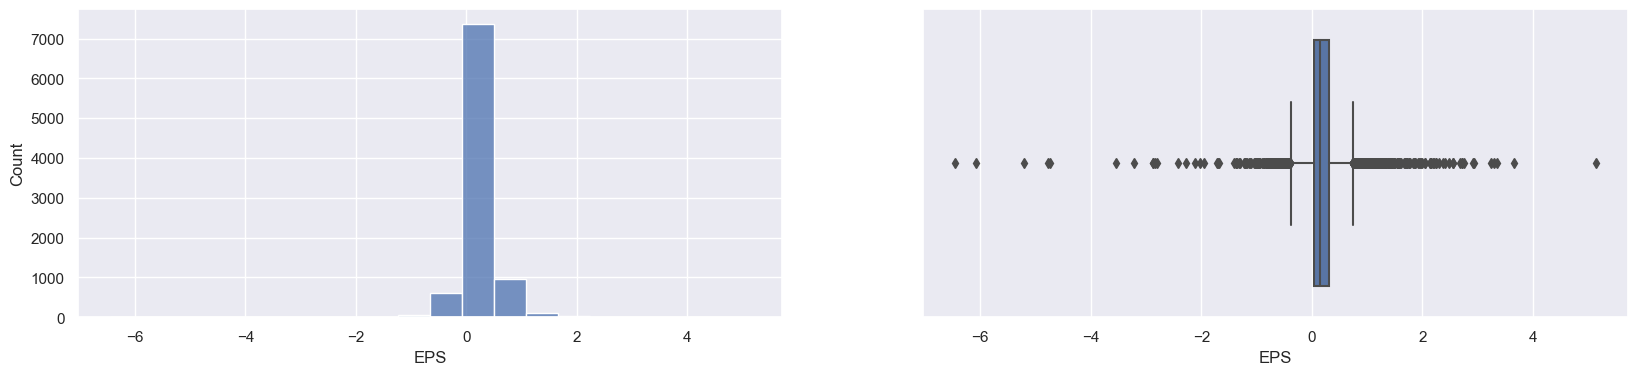

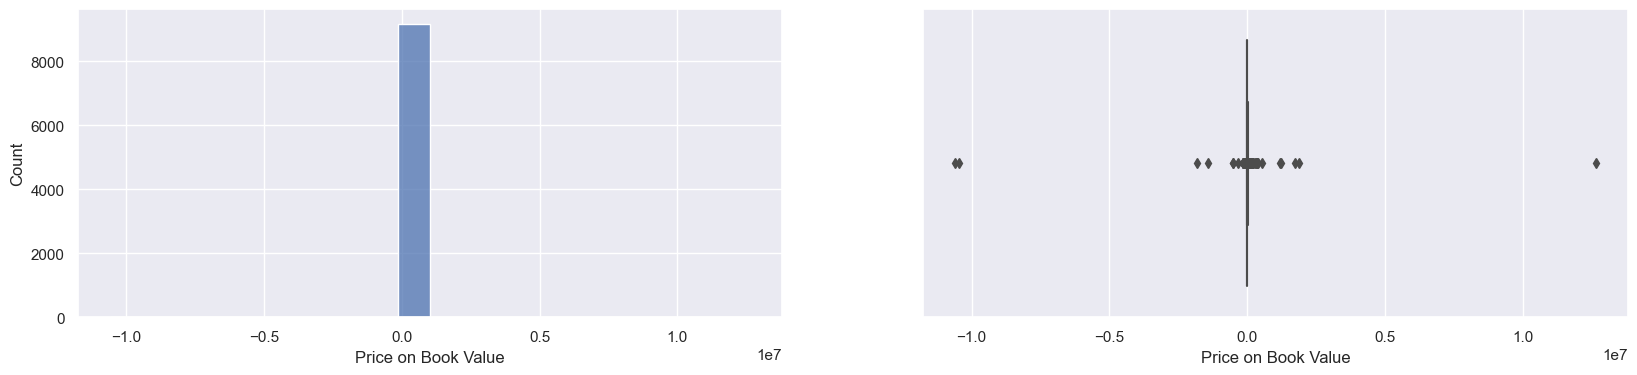

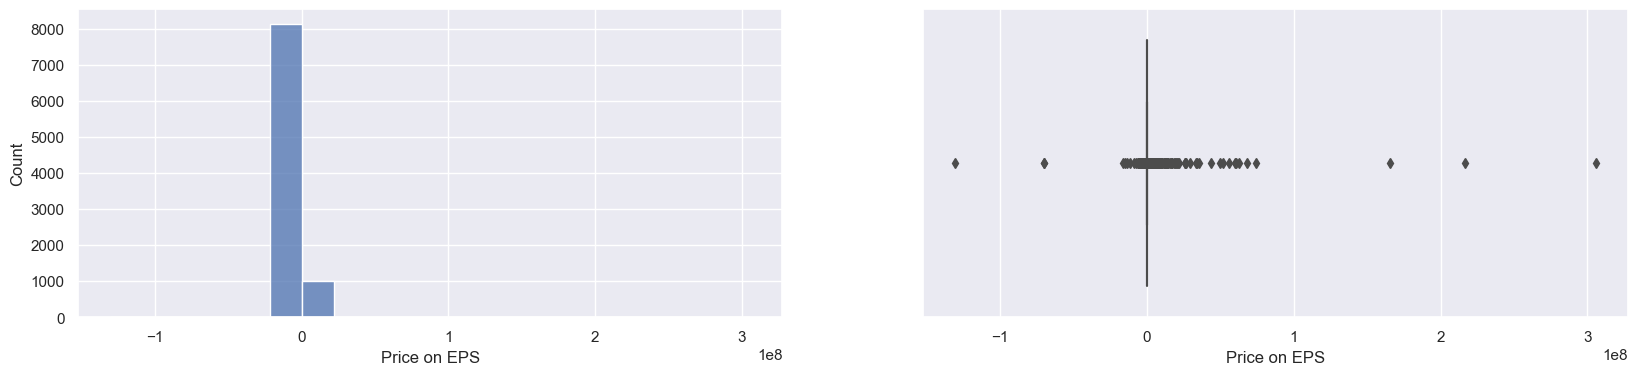

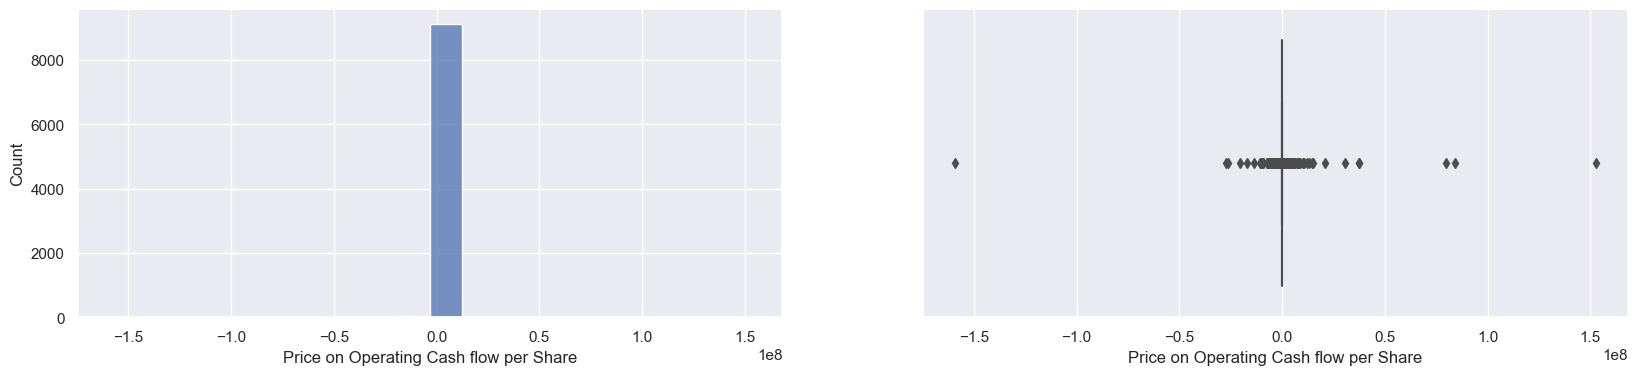

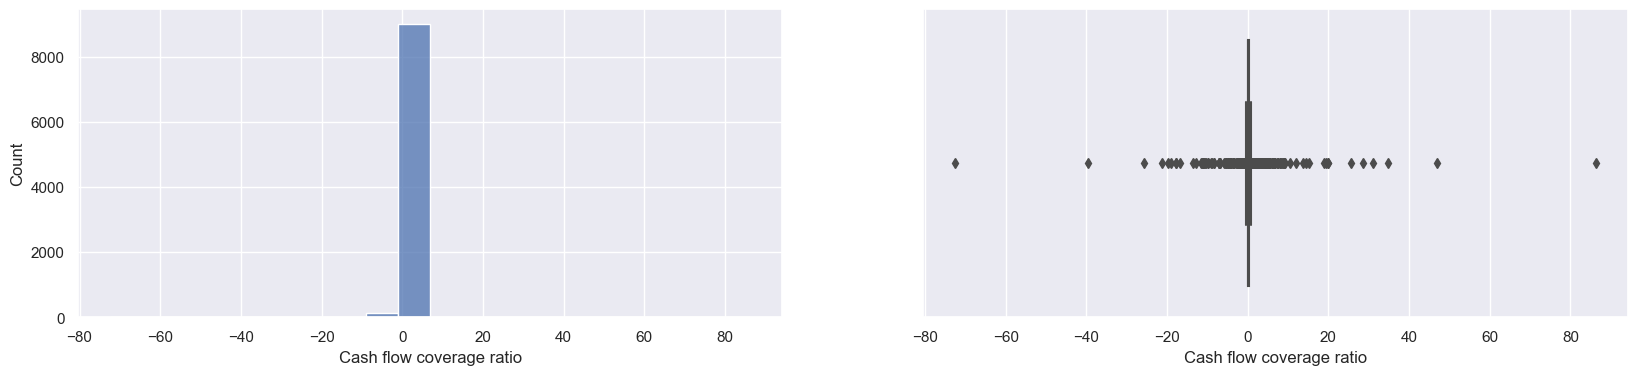

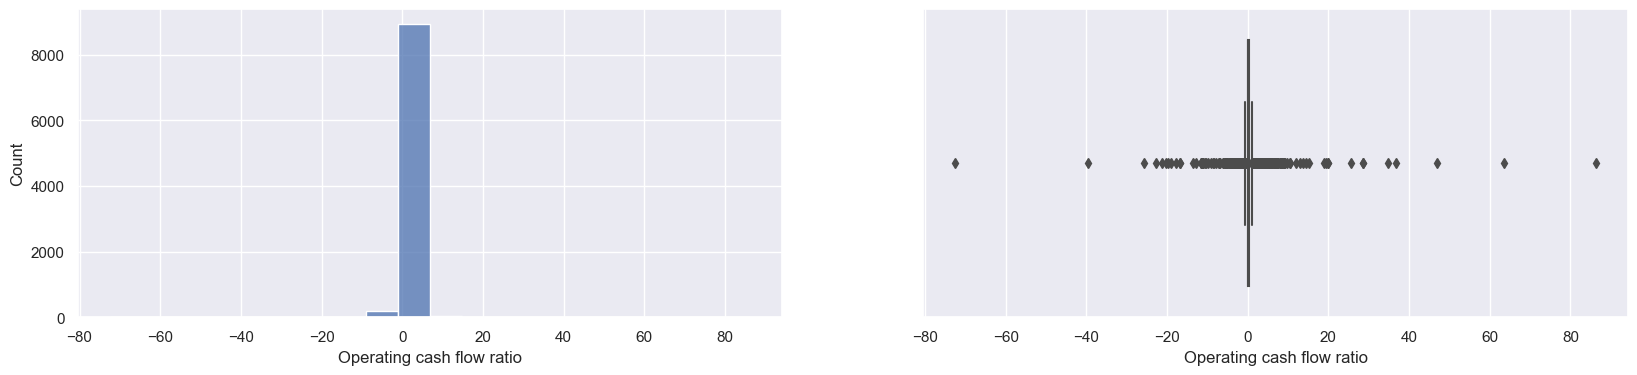

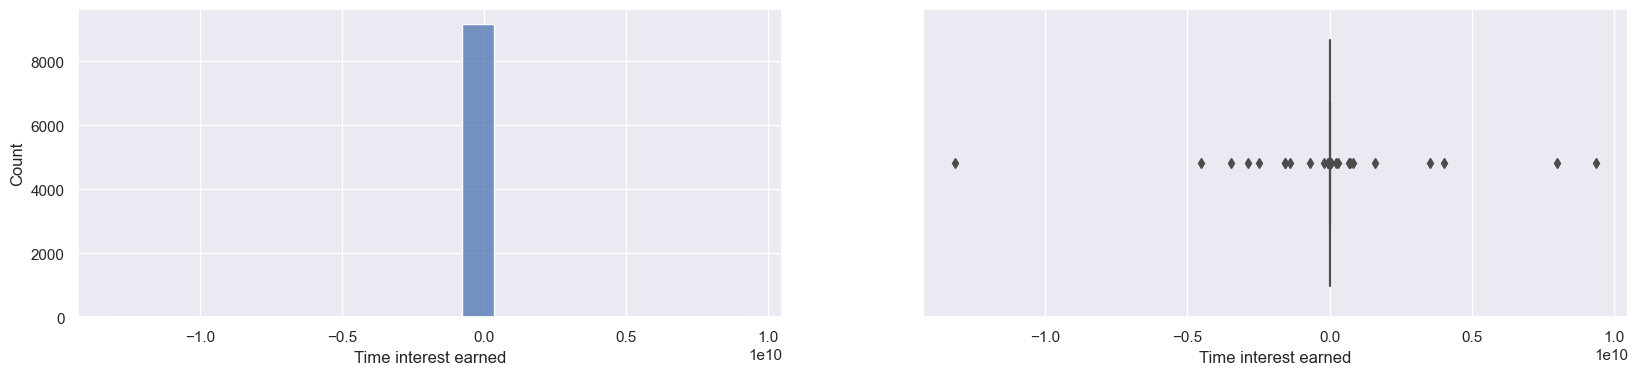

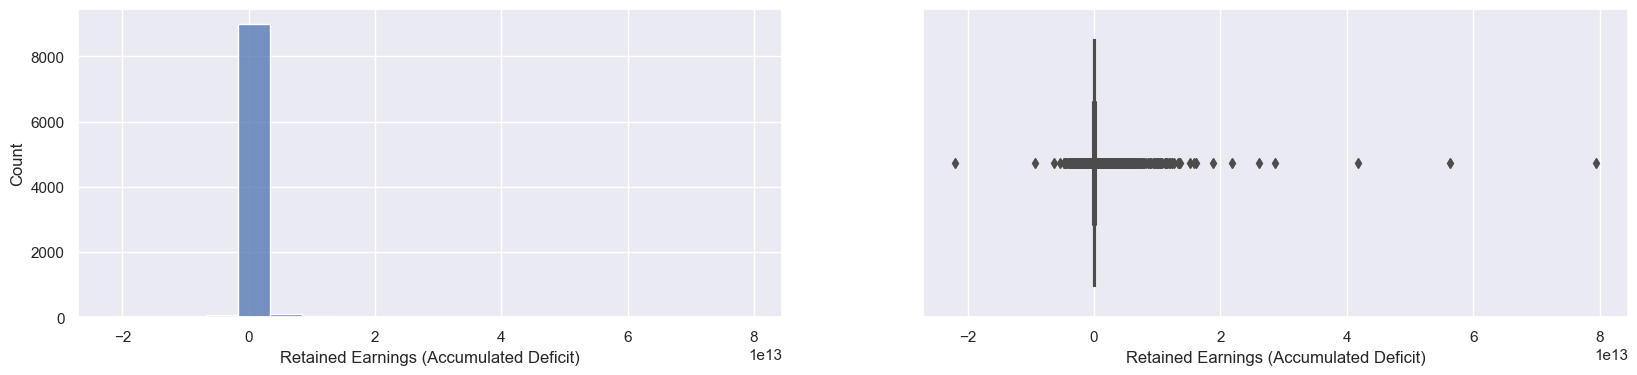

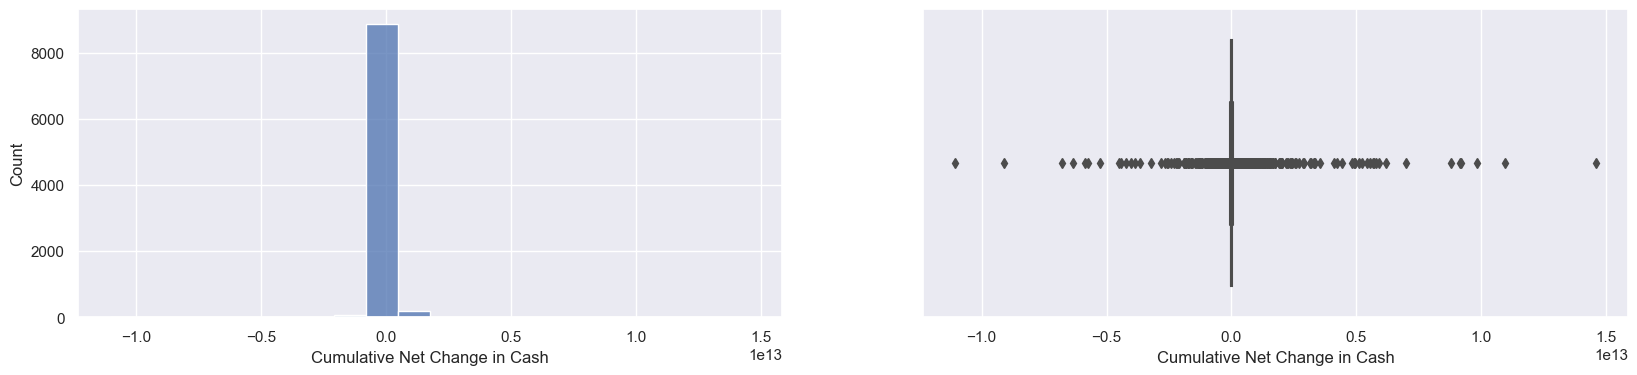

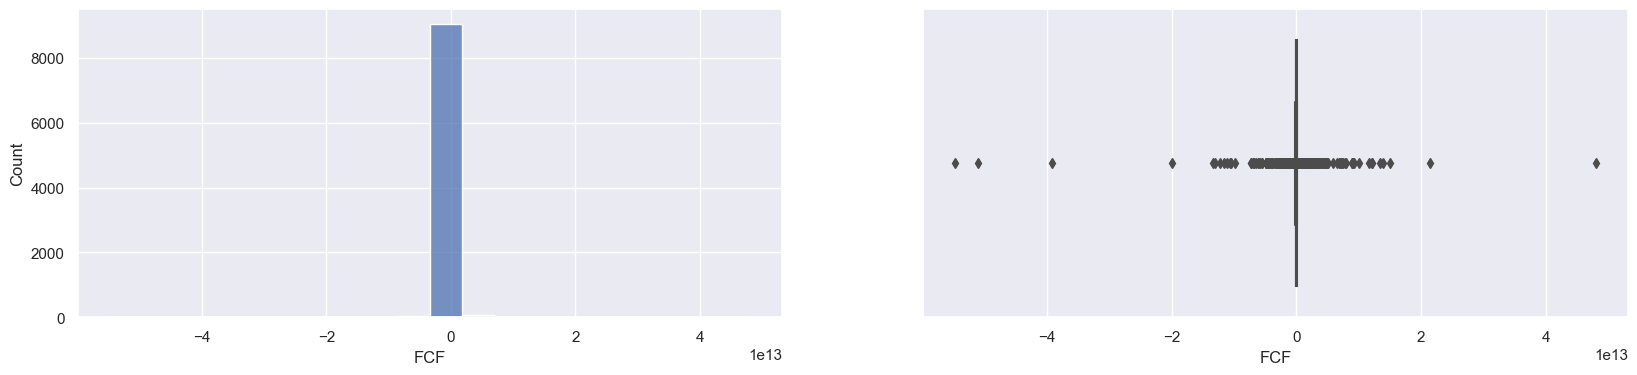

In [7]:
sns.set(style="darkgrid")
for i in list(df_feature.columns):
    fig, ax = plt.subplots(1,2, figsize=(20, 4))
    sns.histplot(data=df_feature, x=i, bins=20, ax=ax[0])
    sns.boxplot(data=df_feature, x=i, ax=ax[1])
    plt.show()

### Ploting Heatmap of Correlations among varibles for raw data
## df_feature
### At first, Add back the dummy varibles (of course including target varible)

In [8]:
df_feature[['Dividend_in_3_latest_year', 'Target - Dividend Policy']] = df_calculated[['Dividend_in_3_latest_year', 'Target - Dividend Policy']]

### Heatmap

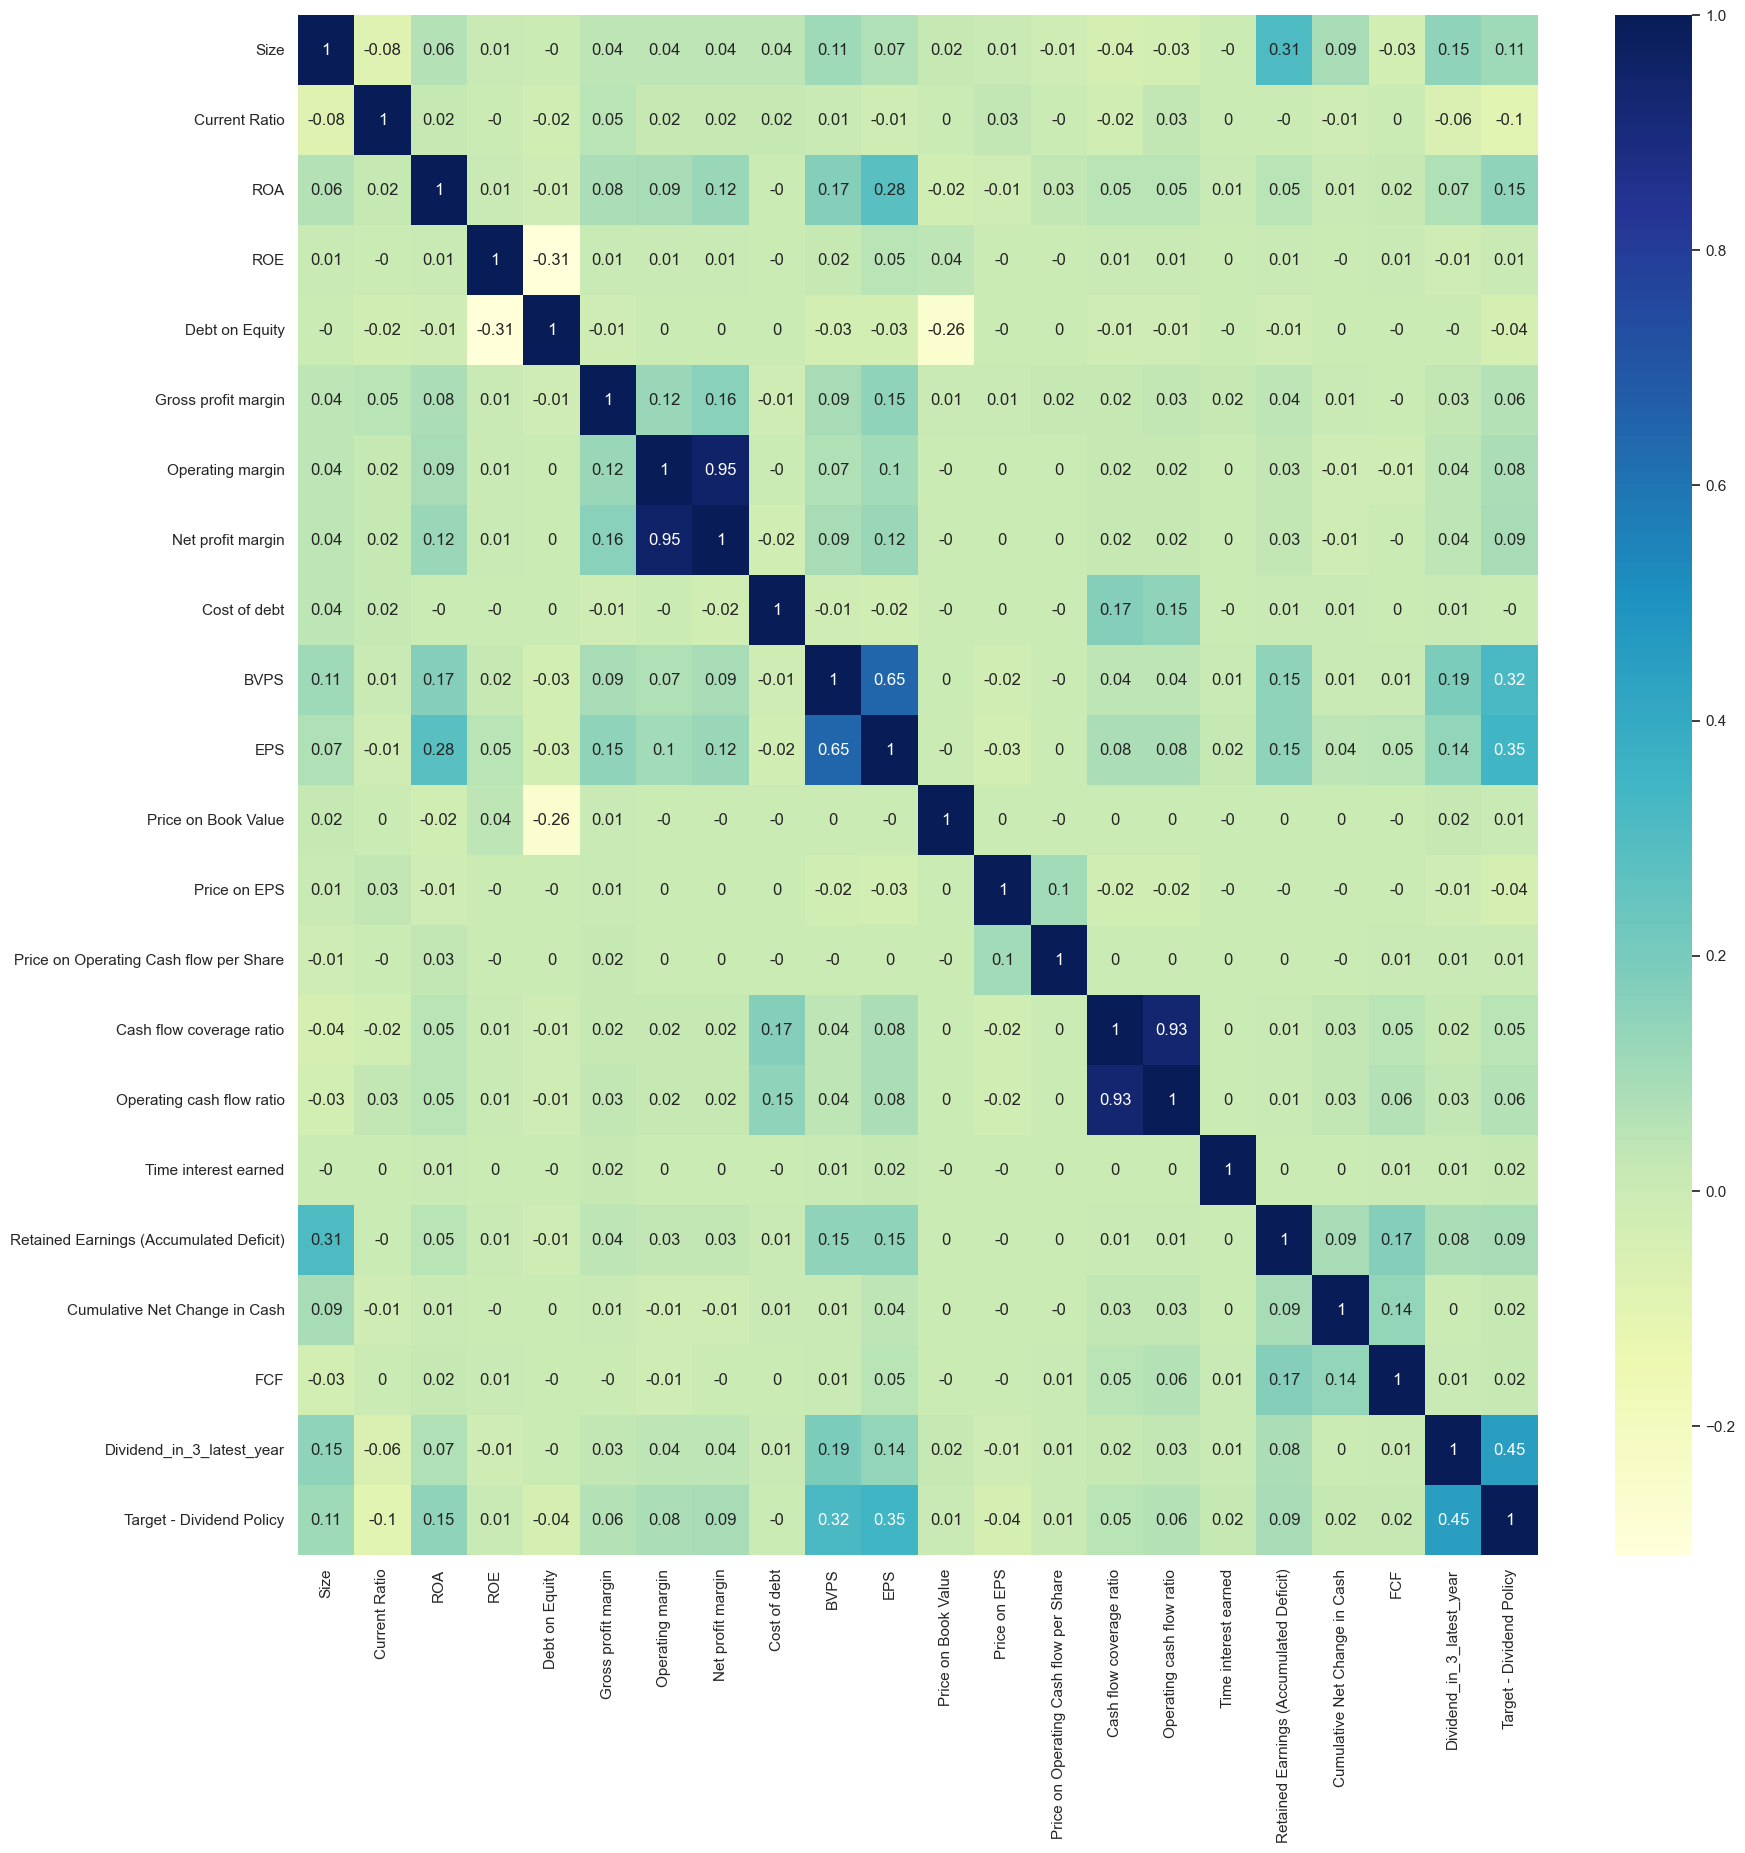

In [9]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_feature.corr().round(2), cmap="YlGnBu", annot=True)
plt.show()

### Heatmap of correlation shows that there are several high correlation pair of features which can cause multicollinearity and negatively affect the model stability and performance
###
### EPS - BVPS (63%)
### The Data already have several Profitability such as ROA and ROE which are low correlated with others. Additionally, using both EPS and P/E (Price on EPS) seem not really necessary --> Drop EPS
### -----------------------------------------------------------
### Cash flow coverage ratio - operating cash flow ratio (96%)
### Cash flow coverage ratio indicates how the cash of company can cover its total debt while operating cash flow ratio indicates how the cash of company can cover its current liabilities. I assume the company will consider the current liabilities (company have to pay back within the fiscal year) for its dividend policy than the total debt (including long term debts which do not have to be paid back within the fiscal year). Hence I keep operating cash flow ratio --> Drop Cash flow coverage ratio
### ------------------------------------------------------------
### Net profit margin - Operating margin (98%); Net profit margin - Gross profit margin (65%); Gross profit - Operating margin (68%)
### Operating margin = Operating Income / Total Revenue and Gross profit margin = Gross profit/ Total Revenue, these ratios are used to consider how the company manage their cost of goods sale (or revenue cost) and how the company is operating, however they have no much sense when using these ratios to compare companies in different industries because they are different specialities in operating and financing. While Net profit margin which equals Net Income (before paying dividend)/ Total Revenue is a indicator for how the company is optimizing its profit. Logically, Net Income may be more closely related to Dividend policy decision than Operating Income which would differently change among different companies after being deducting from paying interest expense and tax. Therefore, I would rather keep Net profit margin --> drop Operating margin and Gross profit margin



In [10]:
df_feature.drop(columns=['EPS', 'Operating margin', 'Cash flow coverage ratio', 'Gross profit margin'], inplace = True)

In [11]:
df_new = df_calculated.drop(columns=['EPS', 'Operating margin', 'Cash flow coverage ratio', 'Gross profit margin']).round(4)
df_new

,Code,Year,Size,Current Ratio,ROA,ROE,Debt on Equity,Net profit margin,Cost of debt,BVPS,Price on Book Value,Price on EPS,Price on Operating Cash flow per Share,Operating cash flow ratio,Time interest earned,Retained Earnings (Accumulated Deficit),Cumulative Net Change in Cash,FCF,Dividend_in_3_latest_year,Target - Dividend Policy
0,AAA.HM,2010,27.1925,1.3351,0.1399,0.2797,0.9997,0.1328,-0.0026,3.1605,2418.1407,8385.8083,-948461.0614,-0.0037,-117.6580,111135102680,-57625671060,-1.518024e+11,1,1
1,AAA.HM,2011,27.4284,0.8607,0.0802,0.1869,1.3308,0.0719,-0.0026,3.3055,832.1158,4158.9541,4851.1022,0.1639,-63.3265,126817336000,12724988780,-4.068801e+10,1,1
2,AAA.HM,2012,27.5262,1.2119,0.0612,0.1063,0.7365,0.0546,-0.0068,2.5055,1601.6531,14409.3502,7150.4084,0.3110,-24.6003,160188377680,70499963380,4.631425e+10,1,1
3,AAA.HM,2013,27.7713,0.9603,0.0477,0.1011,1.1172,0.0475,-0.0120,2.5735,2123.5240,19696.3723,12954.7259,0.1620,-8.7814,177582189740,26845678280,-1.236319e+11,1,1
4,AAA.HM,2014,27.9828,1.3678,0.0330,0.0604,0.8298,0.0301,-0.0010,1.8784,3159.9129,50049.0768,23670.6332,0.1956,-86.6664,187992781670,206540992310,-9.991252e+09,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9183,YEG.HM,2021,27.9475,2.8116,0.0144,0.0224,0.5520,0.0183,0.0700,2.7373,9315.6918,402988.4688,-90230.2957,-0.2191,3.8770,20536615720,-32091269400,-9.131227e+10,1,0
9184,YTC.HNO,2017,27.3521,1.0200,0.0174,0.2467,13.2119,0.0265,-0.0005,1.7285,18800.7806,76203.0846,53300.1379,0.0273,-48.4254,4054906770,53852638900,1.629250e+09,1,1
9185,YTC.HNO,2018,27.3683,1.0423,0.0183,0.2493,12.6052,0.0266,-0.0007,1.8264,45025.1446,179768.1181,-77114.7089,-0.0477,-32.5726,5221307100,-45868479210,-3.317383e+10,1,1
9186,YTC.HNO,2019,27.3707,0.9559,-0.0094,-0.2821,28.9079,-0.0151,-0.0000,0.8304,115612.4717,-406646.0001,19870.1302,0.2002,111.2459,-27791862510,82975580000,1.381133e+11,1,1


### Correlation Heatmap after dealing with highly correlated varibles 

In [12]:
df_feature.corr().round(2)

,Size,Current Ratio,ROA,ROE,Debt on Equity,Net profit margin,Cost of debt,BVPS,Price on Book Value,Price on EPS,Price on Operating Cash flow per Share,Operating cash flow ratio,Time interest earned,Retained Earnings (Accumulated Deficit),Cumulative Net Change in Cash,FCF,Dividend_in_3_latest_year,Target - Dividend Policy
Size,1.00,-0.08,0.06,0.01,-0.00,0.04,0.04,0.11,0.02,0.01,-0.01,-0.03,-0.00,0.31,0.09,-0.03,0.15,0.11
Current Ratio,-0.08,1.00,0.02,-0.00,-0.02,0.02,0.02,0.01,0.00,0.03,-0.00,0.03,0.00,-0.00,-0.01,0.00,-0.06,-0.10
ROA,0.06,0.02,1.00,0.01,-0.01,0.12,-0.00,0.17,-0.02,-0.01,0.03,0.05,0.01,0.05,0.01,0.02,0.07,0.15
ROE,0.01,-0.00,0.01,1.00,-0.31,0.01,-0.00,0.02,0.04,-0.00,-0.00,0.01,0.00,0.01,-0.00,0.01,-0.01,0.01
Debt on Equity,-0.00,-0.02,-0.01,-0.31,1.00,0.00,0.00,-0.03,-0.26,-0.00,0.00,-0.01,-0.00,-0.01,0.00,-0.00,-0.00,-0.04
Net profit margin,0.04,0.02,0.12,0.01,0.00,1.00,-0.02,0.09,-0.00,0.00,0.00,0.02,0.00,0.03,-0.01,-0.00,0.04,0.09
Cost of debt,0.04,0.02,-0.00,-0.00,0.00,-0.02,1.00,-0.01,-0.00,0.00,-0.00,0.15,-0.00,0.01,0.01,0.00,0.01,-0.00
BVPS,0.11,0.01,0.17,0.02,-0.03,0.09,-0.01,1.00,0.00,-0.02,-0.00,0.04,0.01,0.15,0.01,0.01,0.19,0.32
Price on Book Value,0.02,0.00,-0.02,0.04,-0.26,-0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.02,0.01
Price on EPS,0.01,0.03,-0.01,-0.00,-0.00,0.00,0.00,-0.02,0.00,1.00,0.10,-0.02,-0.00,-0.00,-0.00,-0.00,-0.01,-0.04


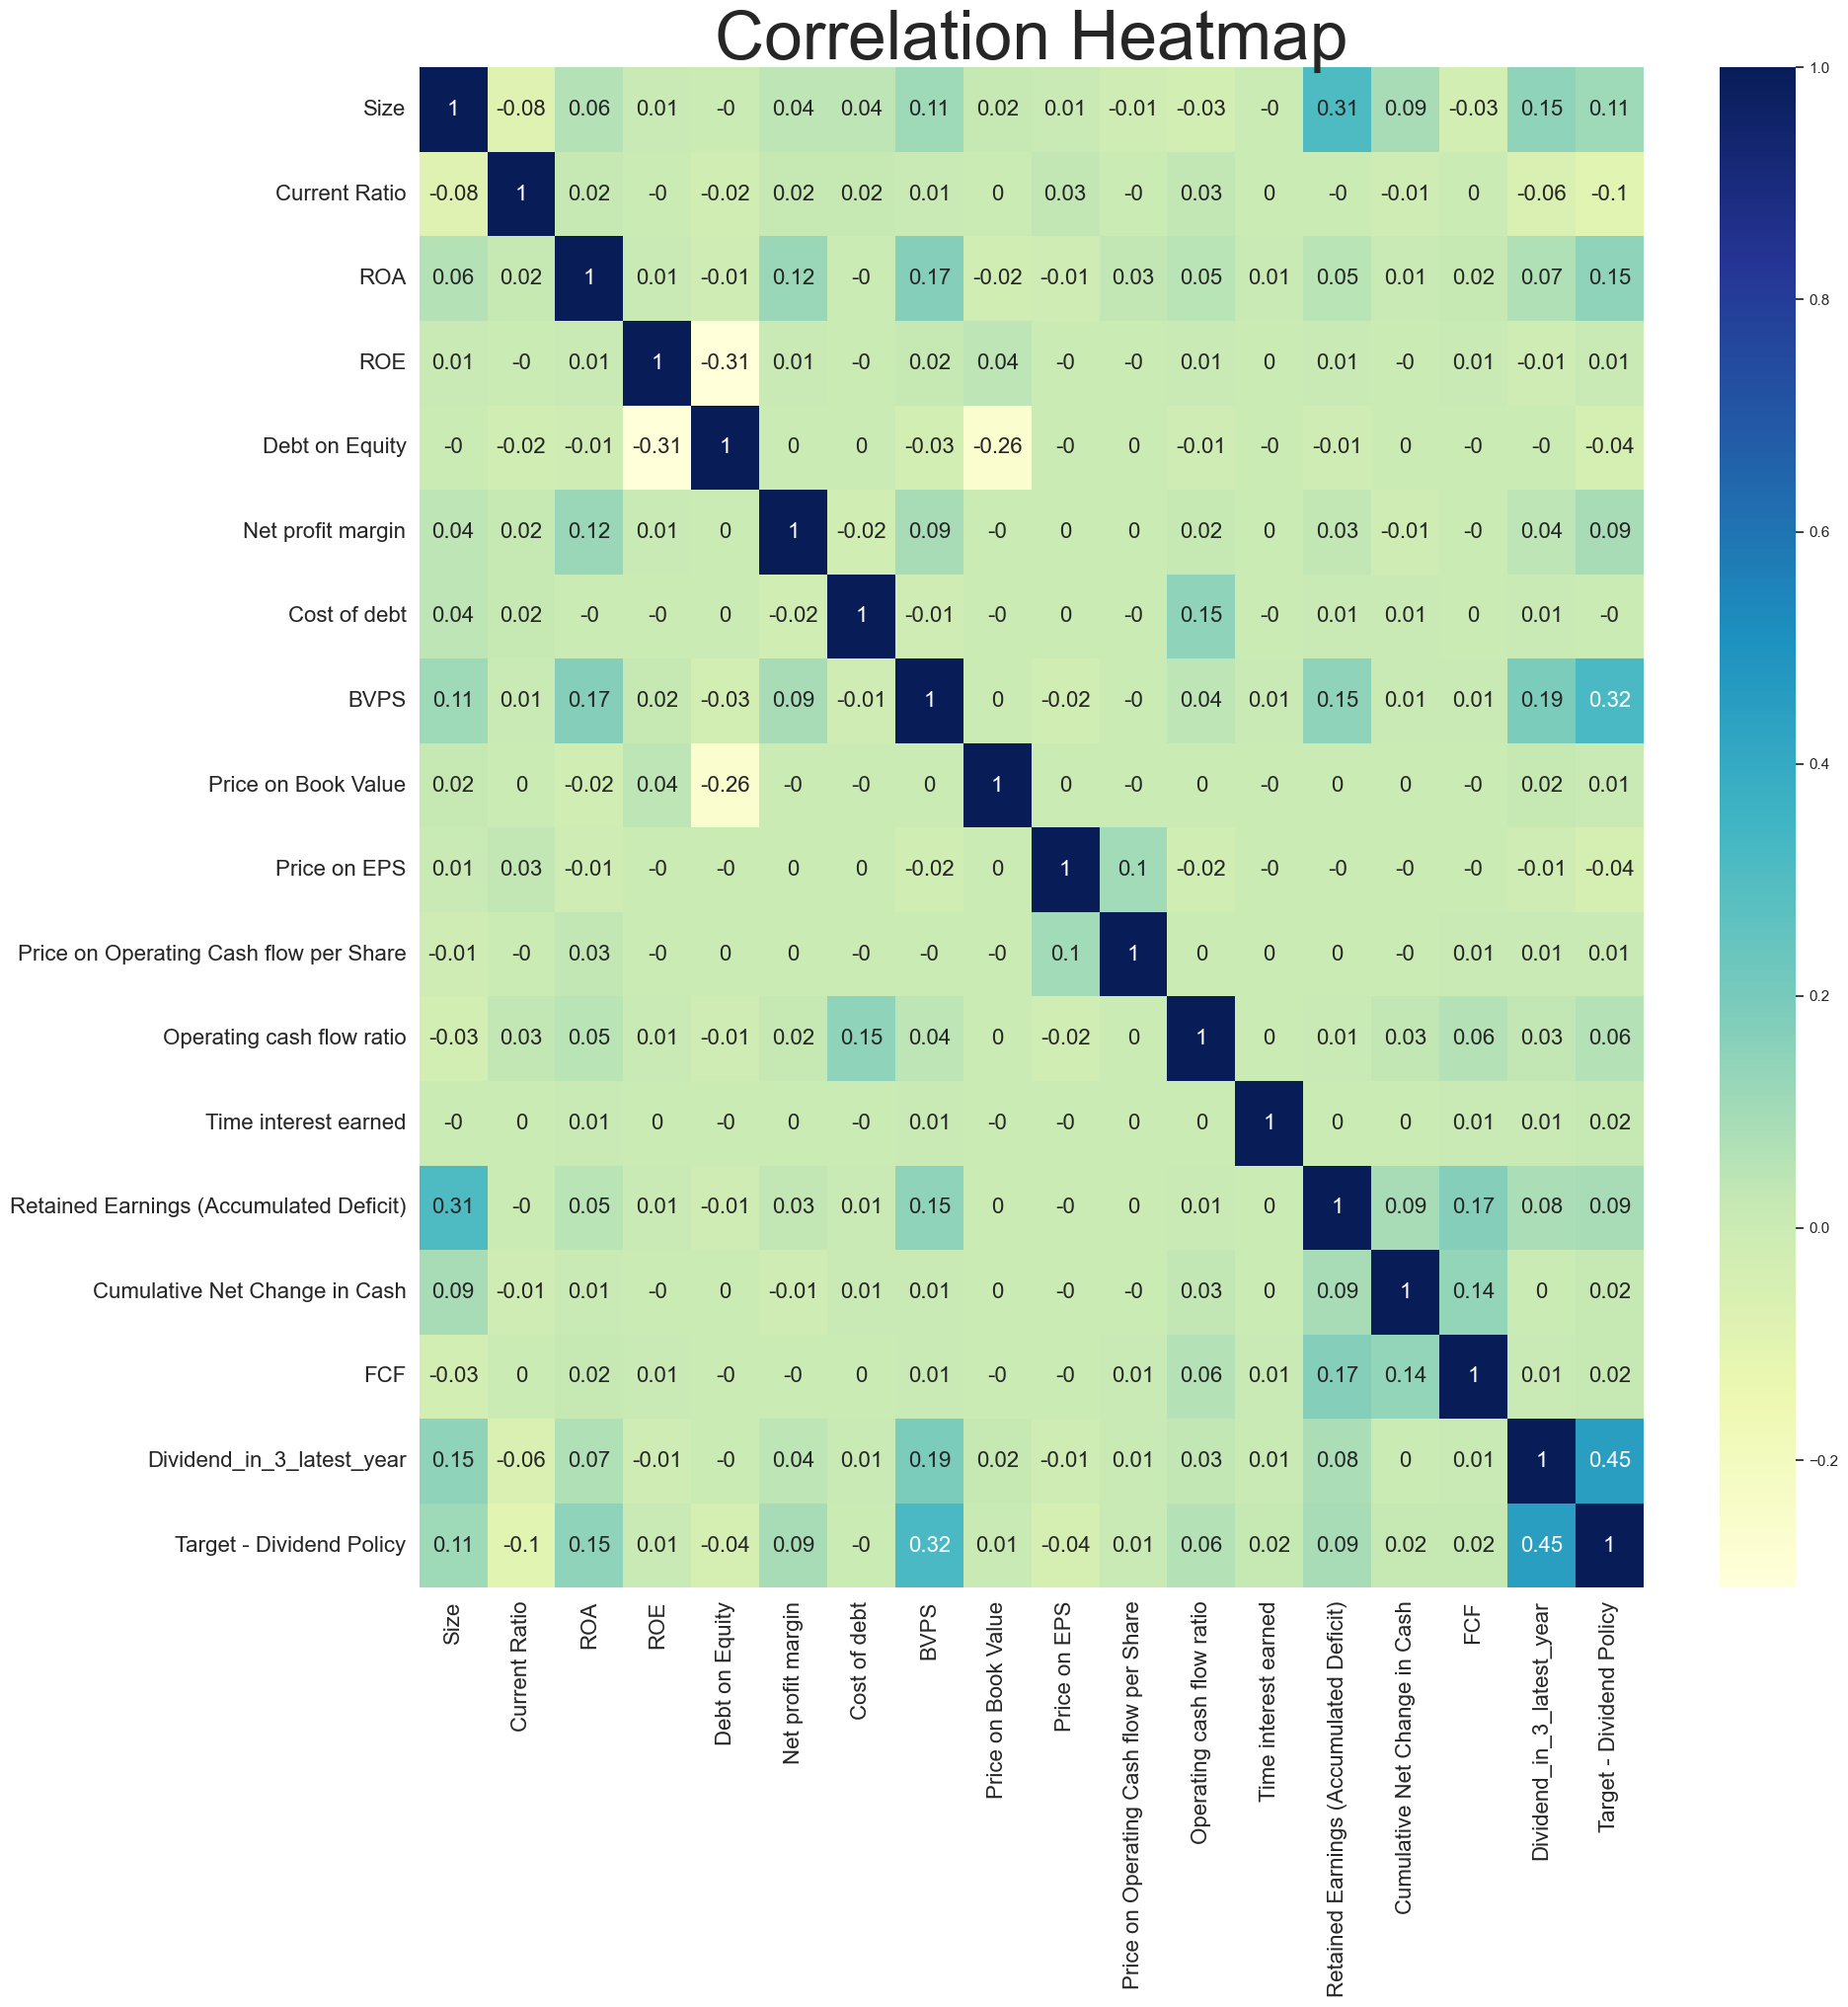

In [13]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_feature.corr().round(2), cmap="YlGnBu", annot=True, annot_kws={"size":16})
plt.xticks(size=16) 
plt.yticks(size=16) 
plt.title('Correlation Heatmap', size = 50)
plt.show()

Correlation between each features with target (Dividend Policy)


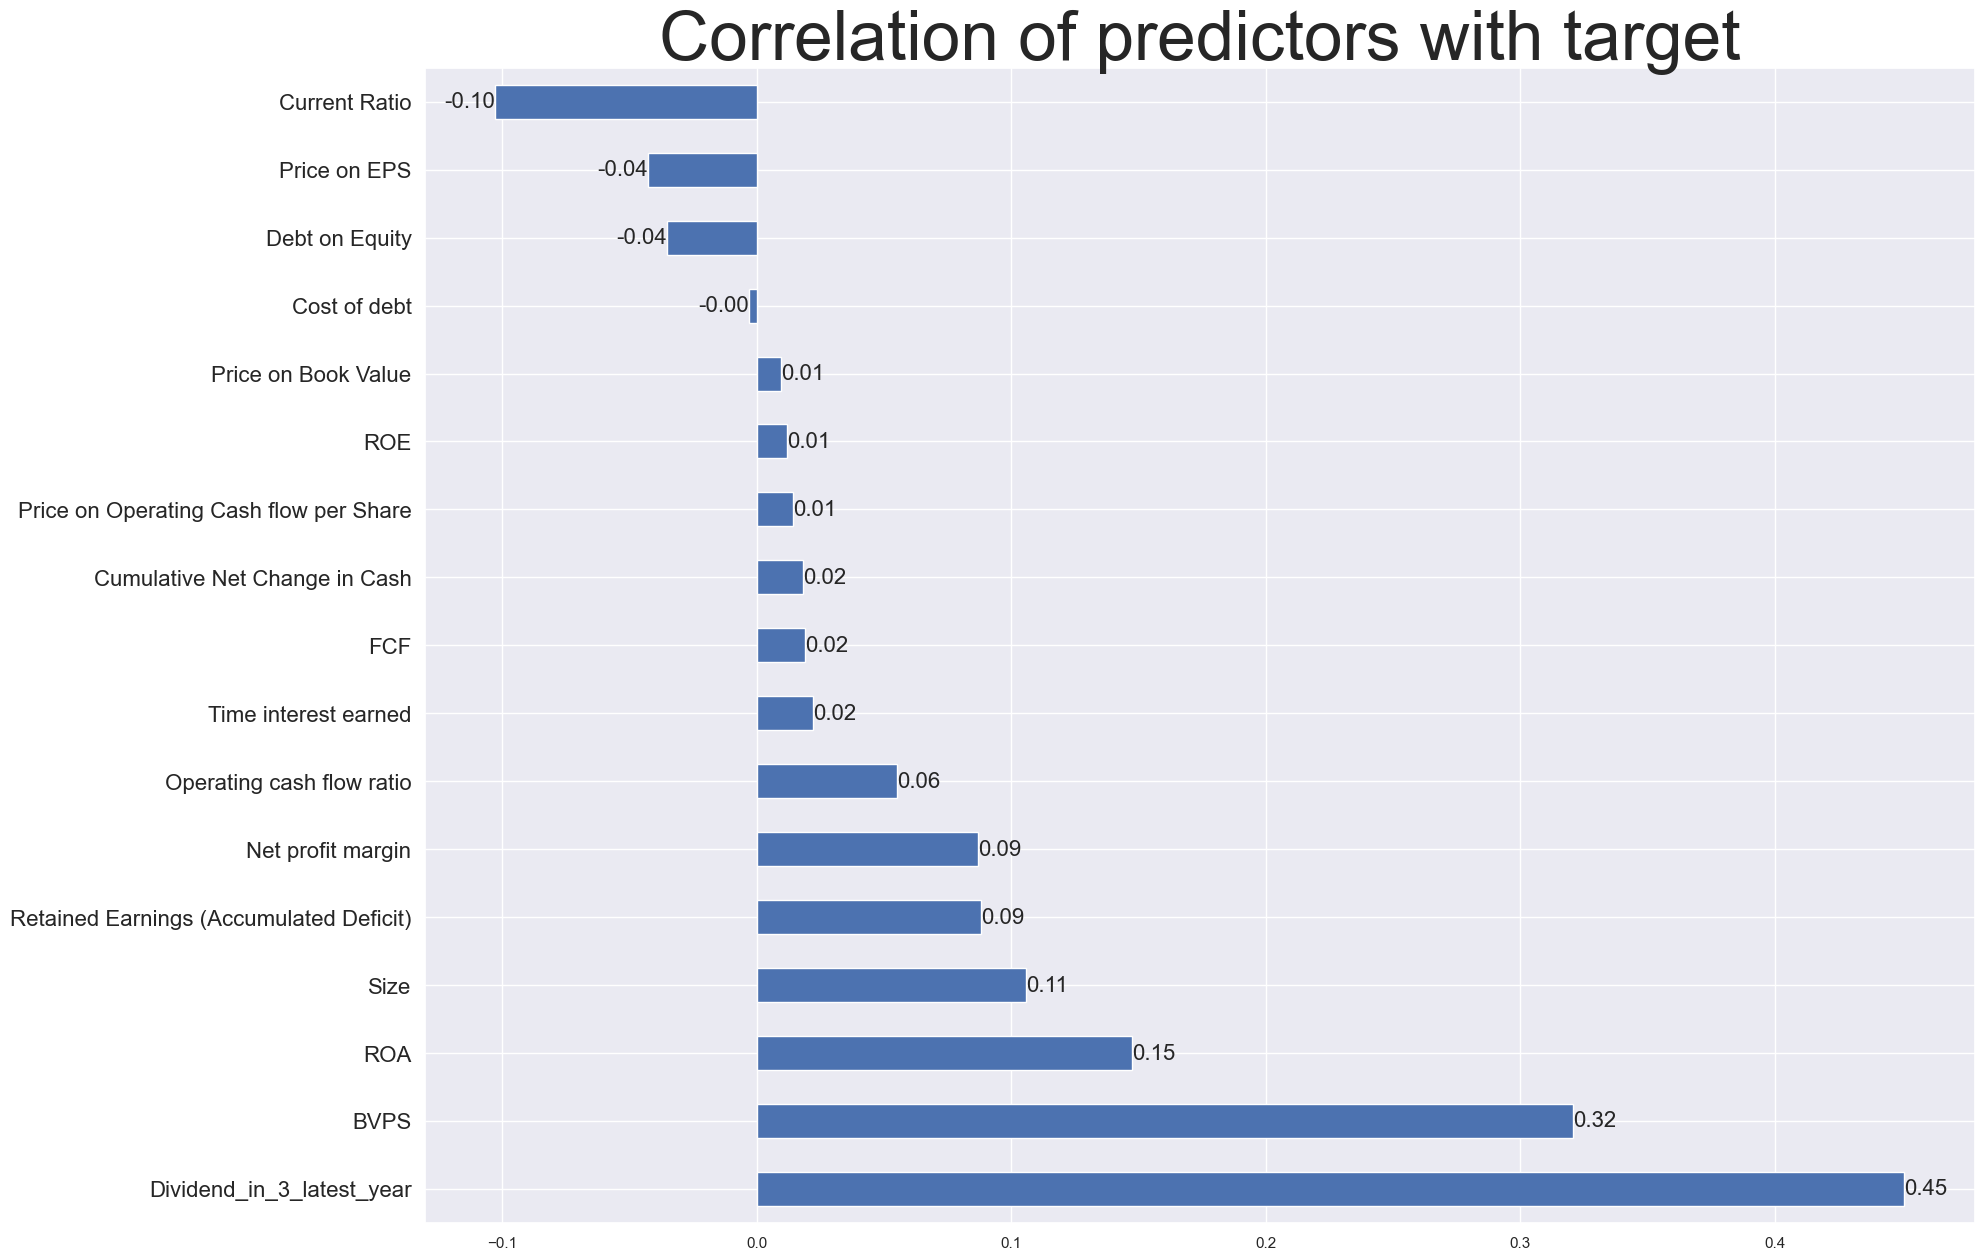

In [14]:
print('Correlation between each features with target (Dividend Policy)')
corr_table_df_feature= pd.DataFrame(df_feature.corr().iloc[0:-1,-1]).sort_values(by='Target - Dividend Policy', ascending= False)
viz = corr_table_df_feature.plot(figsize=(20,15), kind="barh")
viz.set_title('Correlation of predictors with target', fontsize = 50)
plt.yticks(size=16) 
viz.bar_label(viz.containers[0], fmt='%.2f', size = 16)
viz.legend('', frameon=False)

### Check outlier data
### As we can from the histograms and almost varibles seem have outlier problems. These outliers are not errors, they are the result of the differences in size of companies in the dataset. Hence I would not remove the outliers. Besides that, try to find some patterns from the outliers 

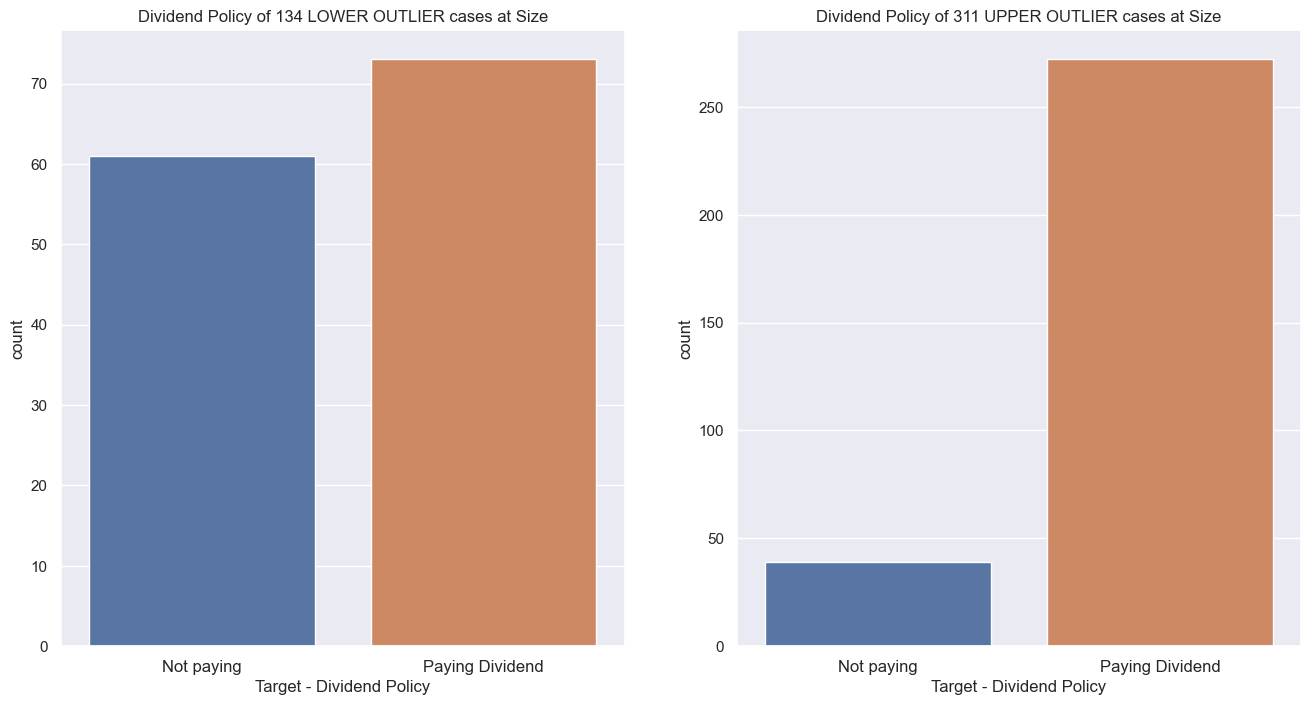

-------------------
There is 0 LOWER OUTLIER cases at Current Ratio
-------------------


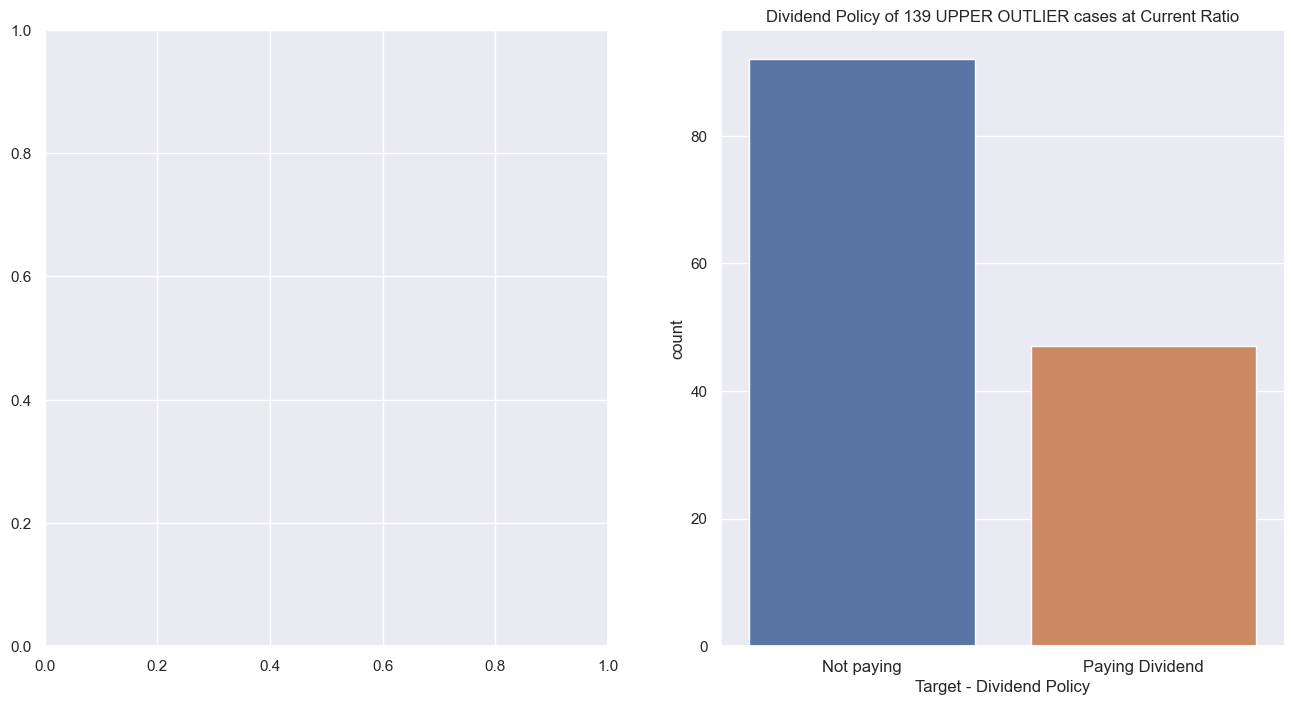

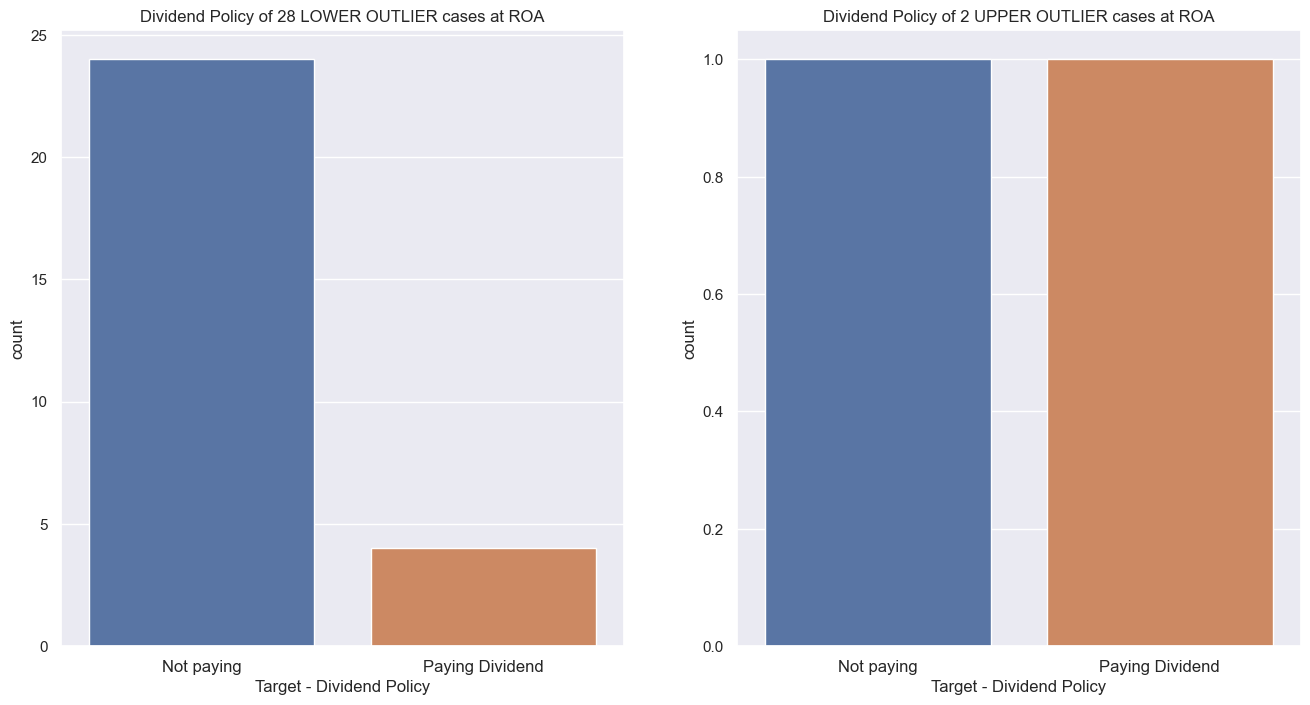

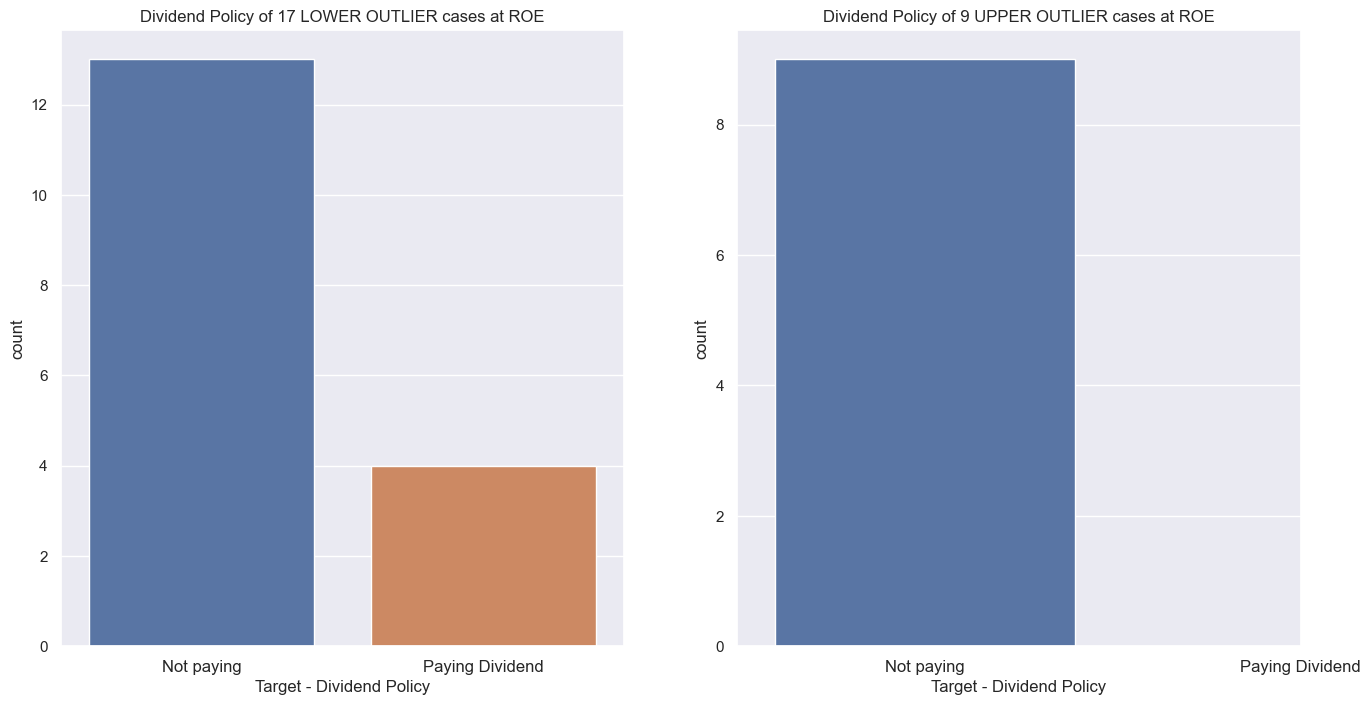

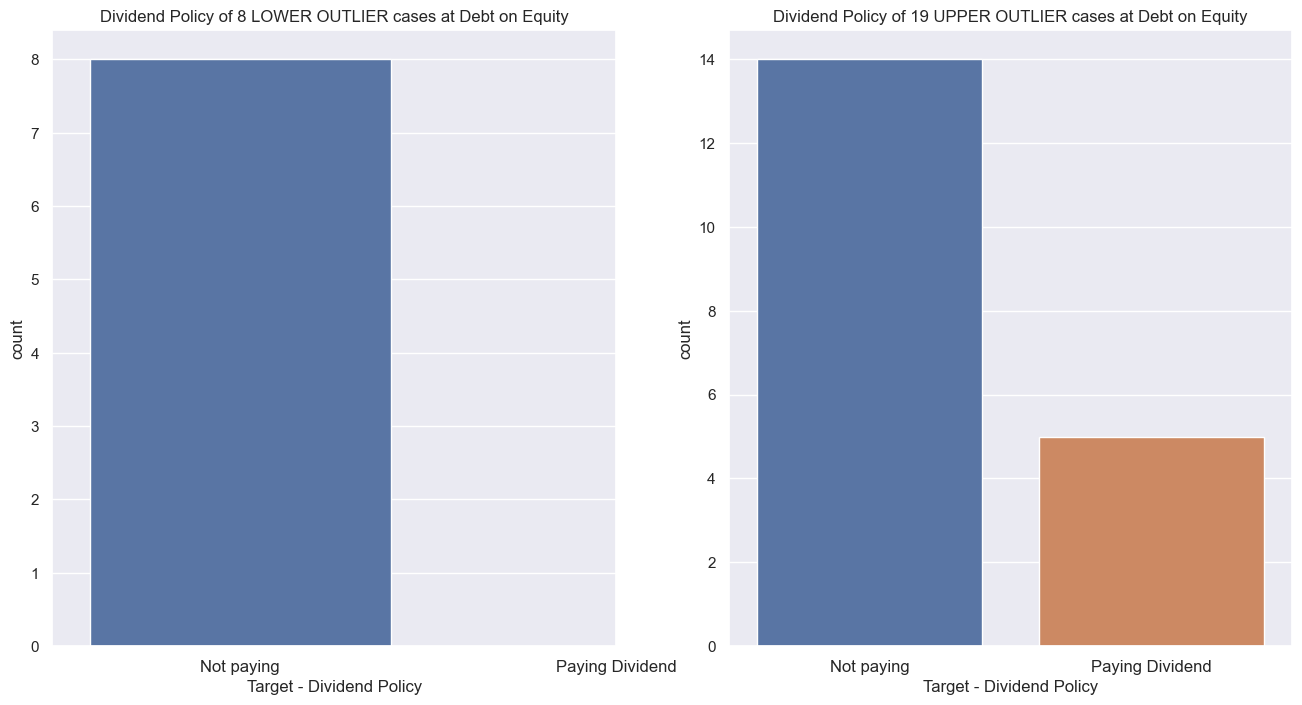

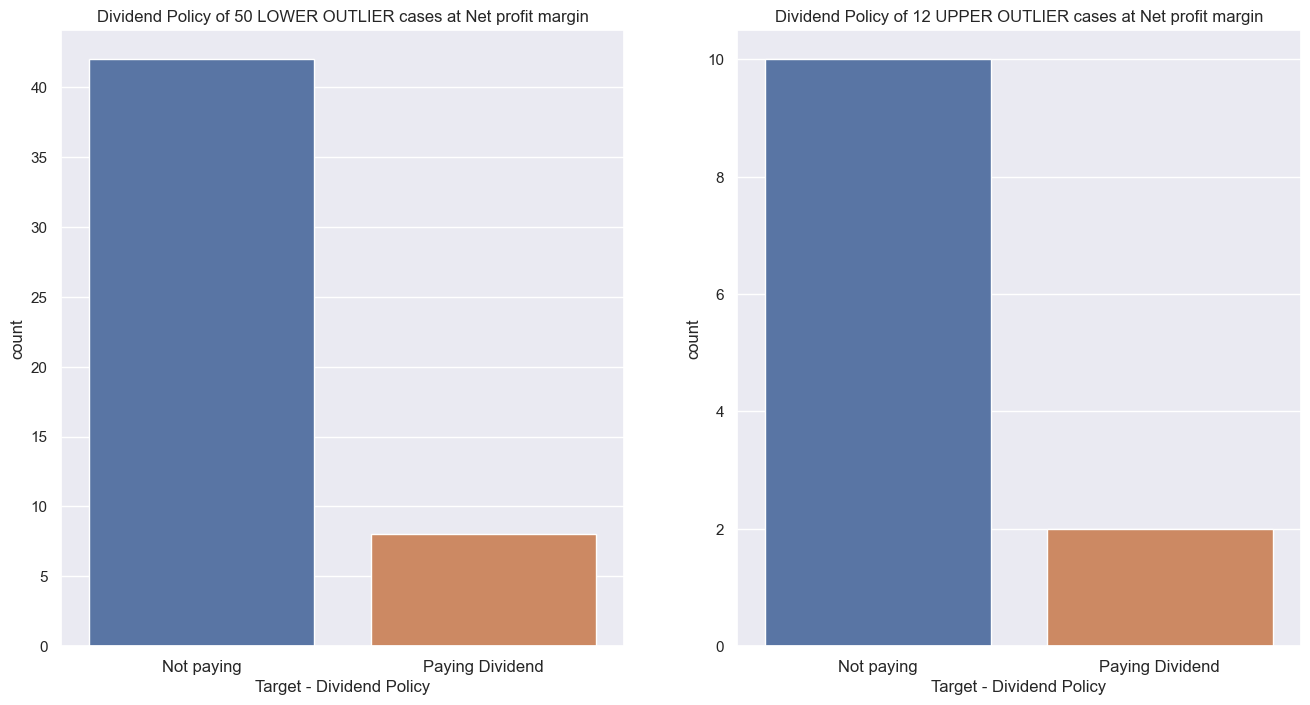

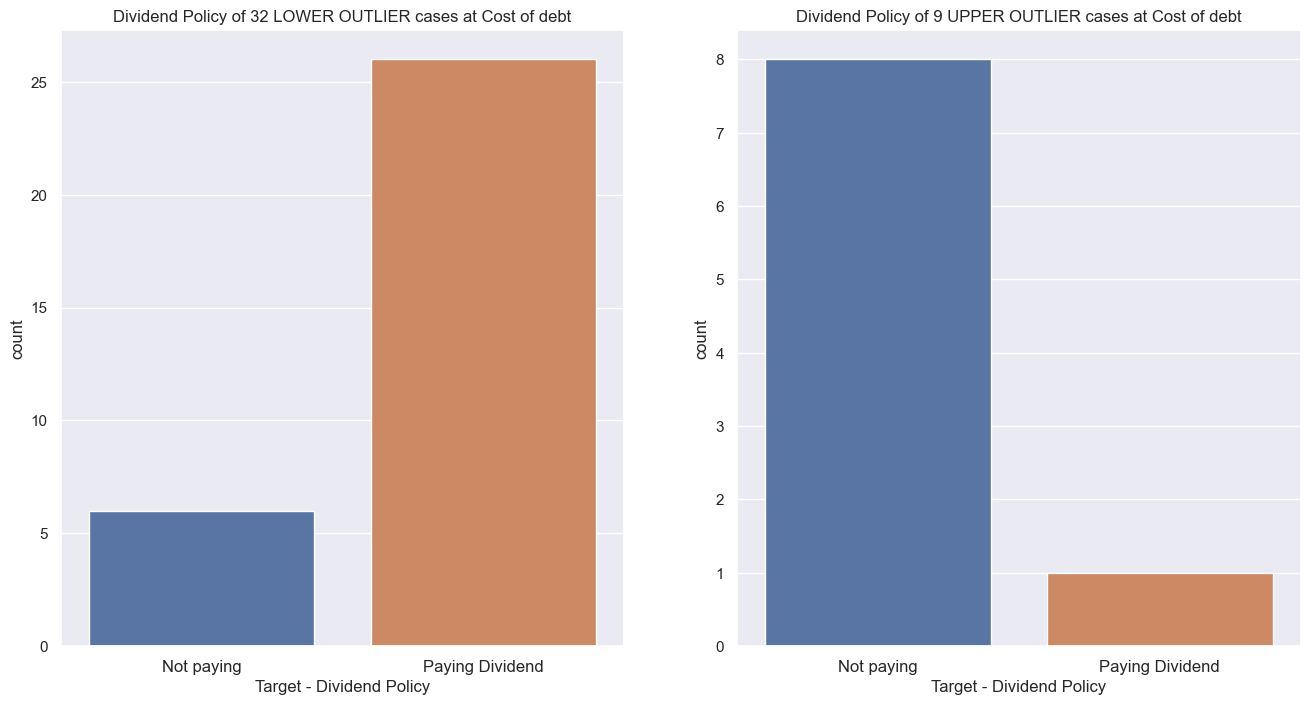

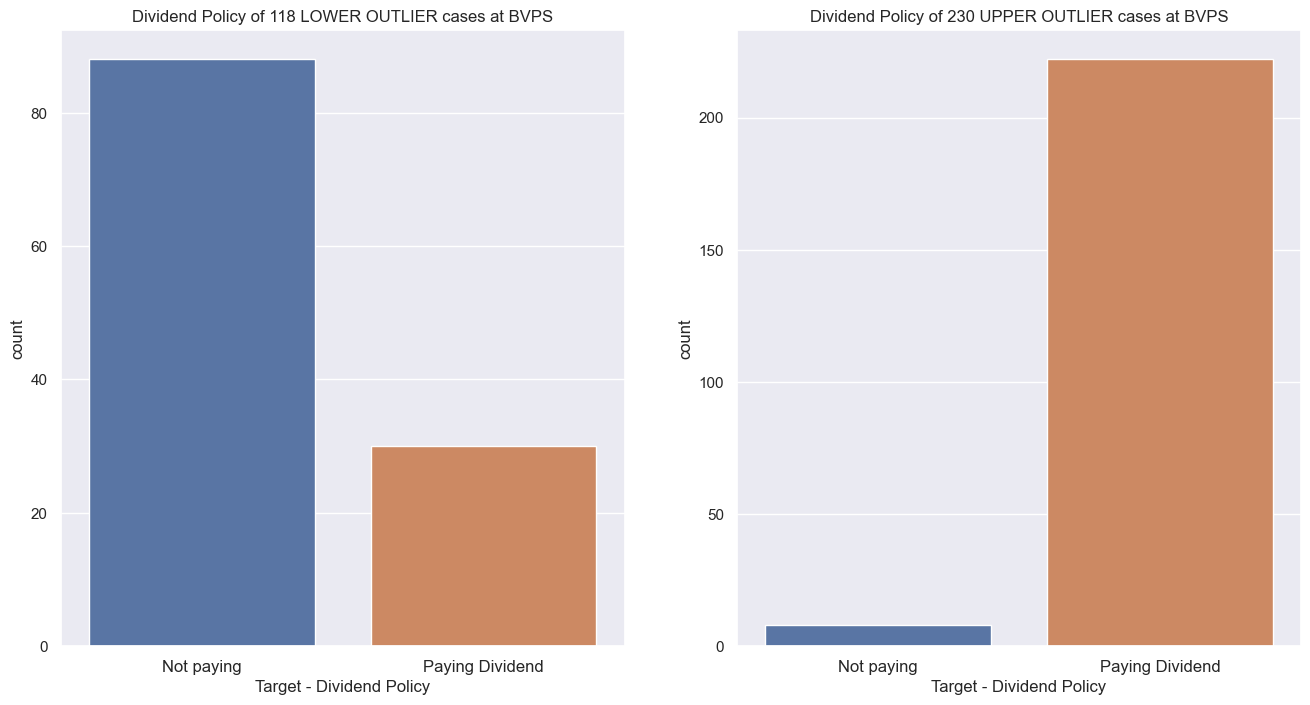

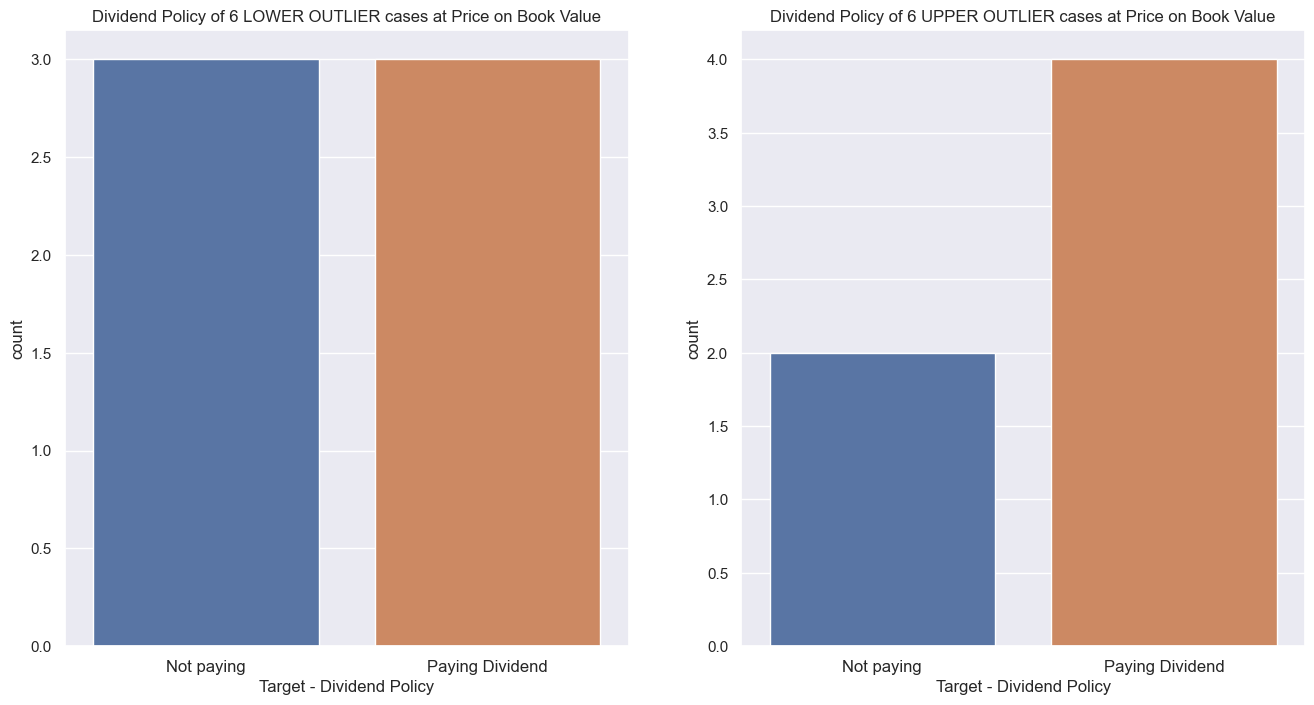

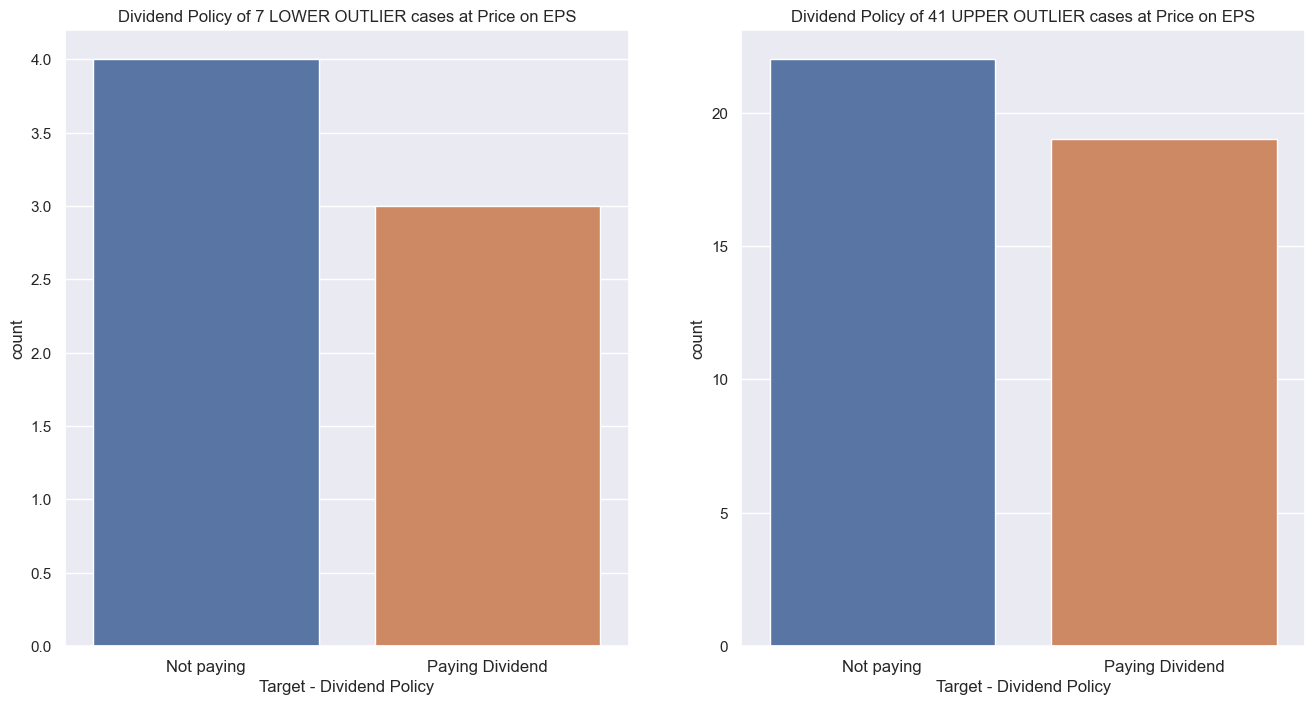

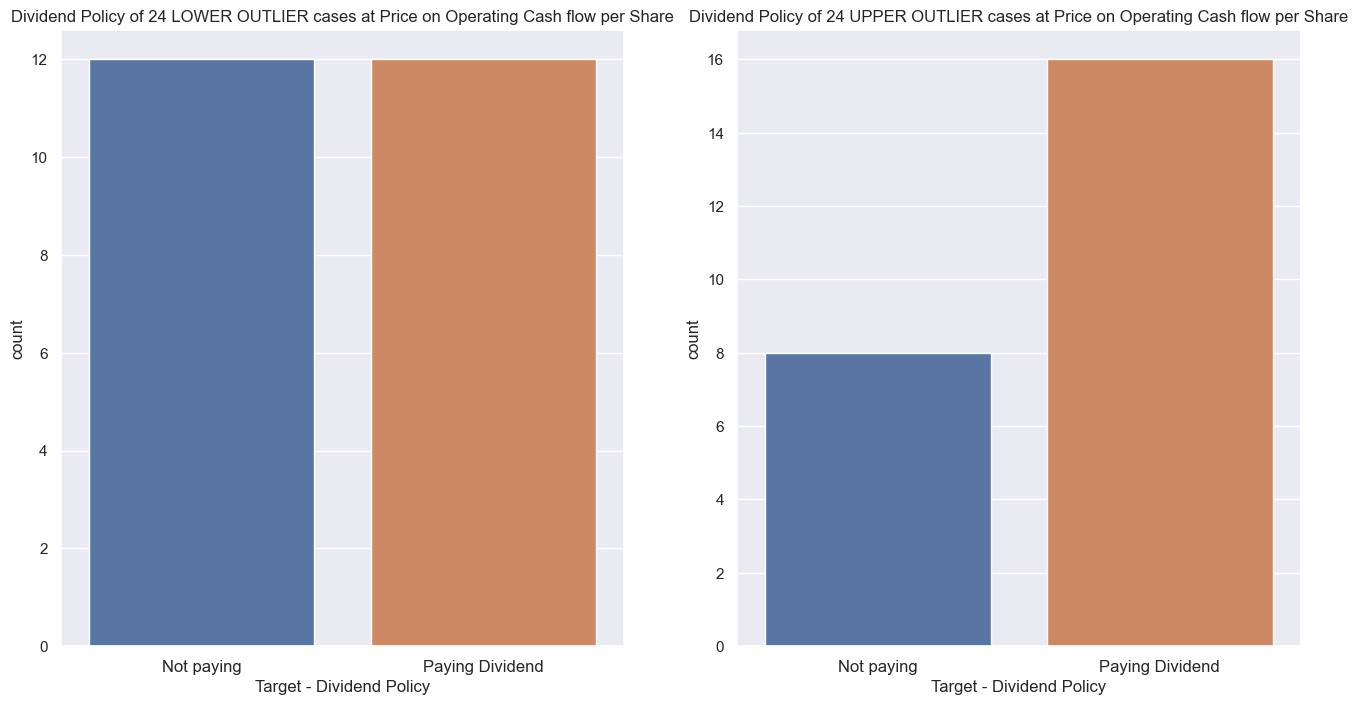

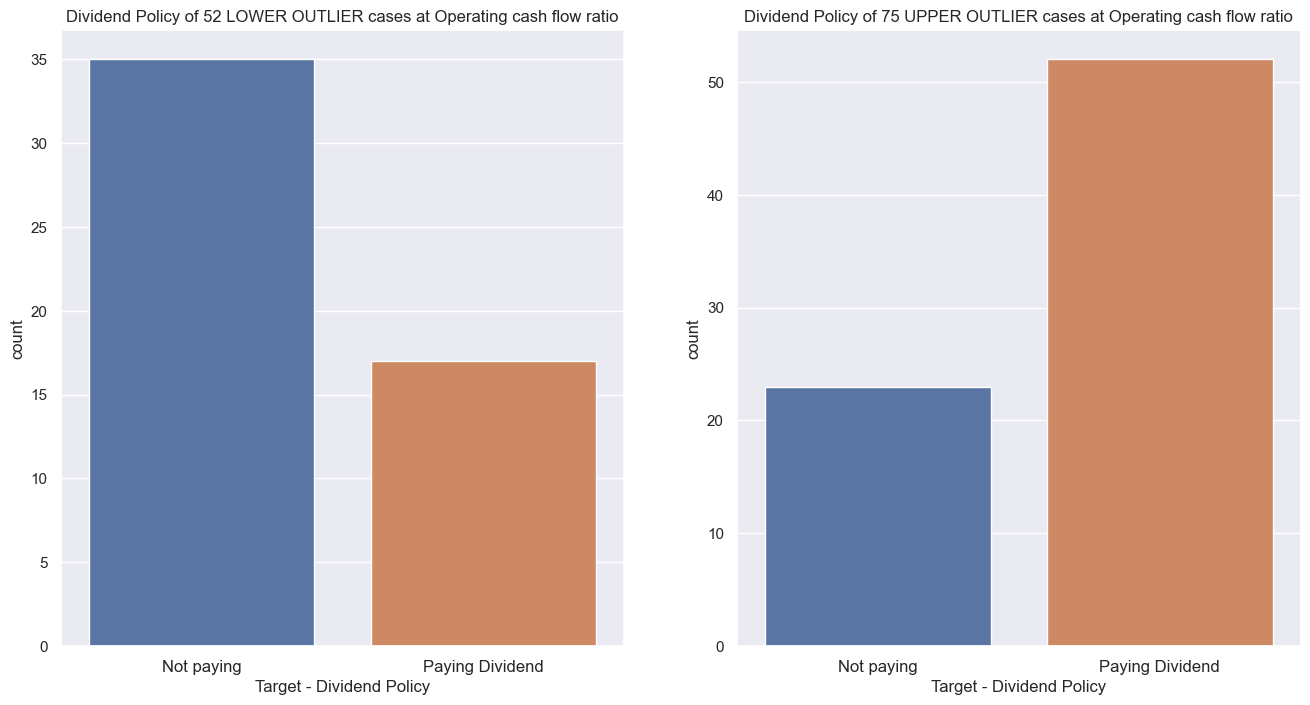

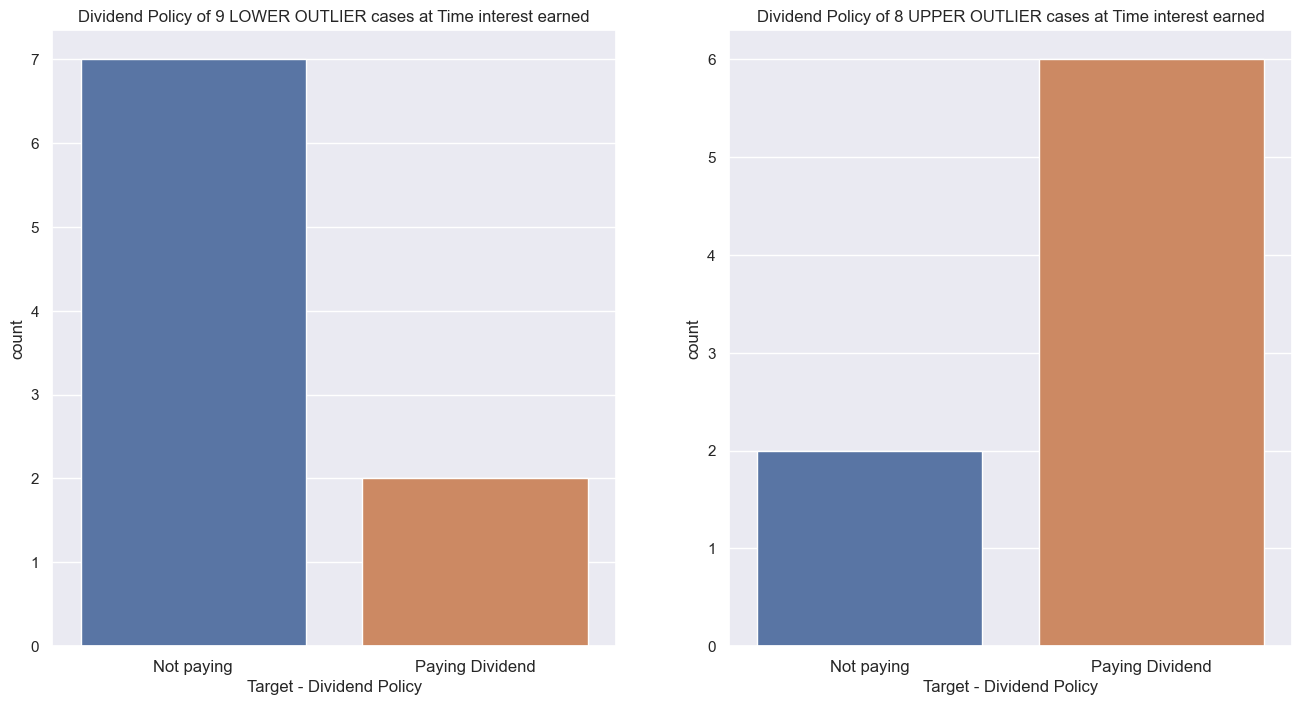

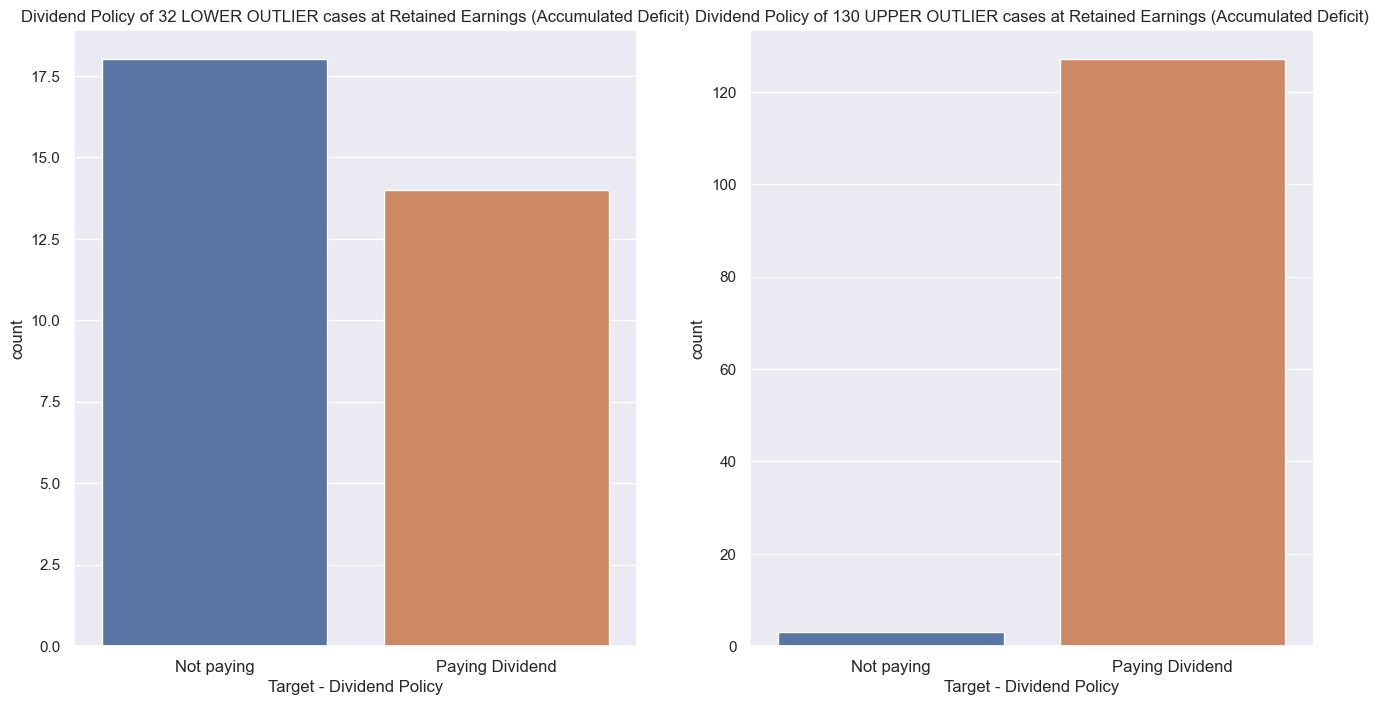

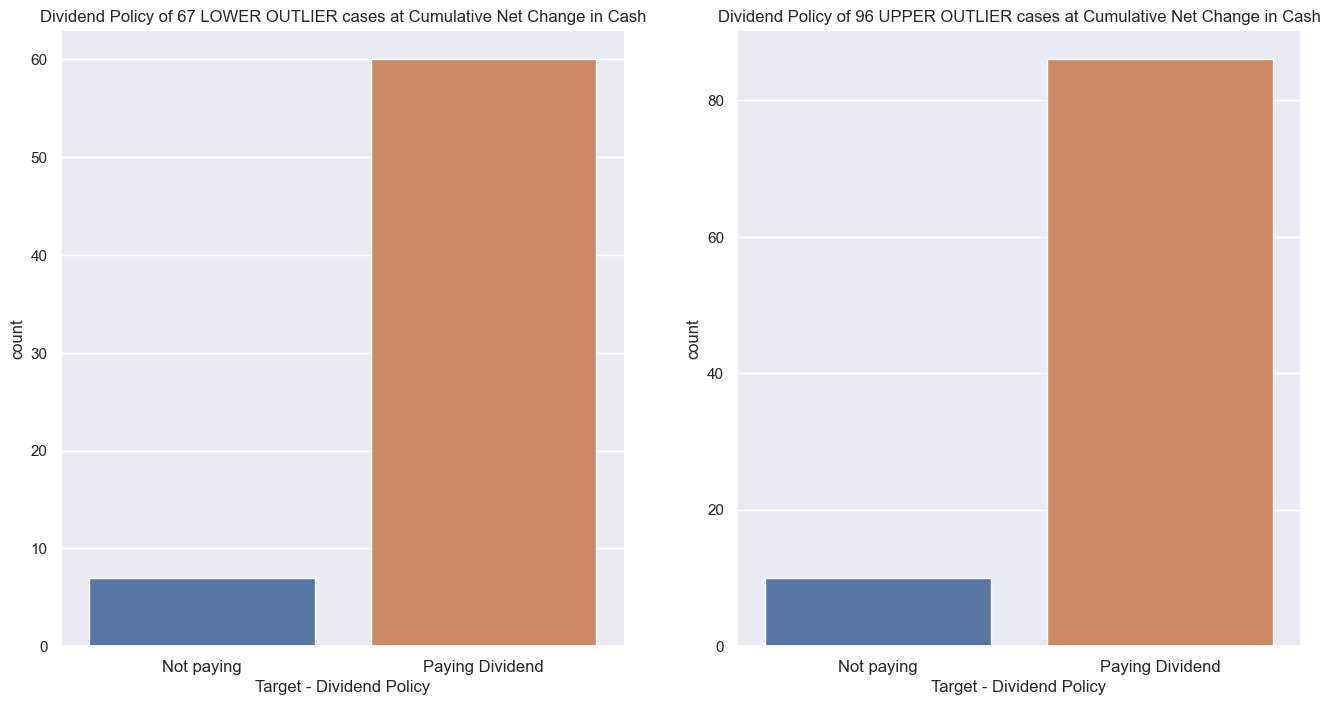

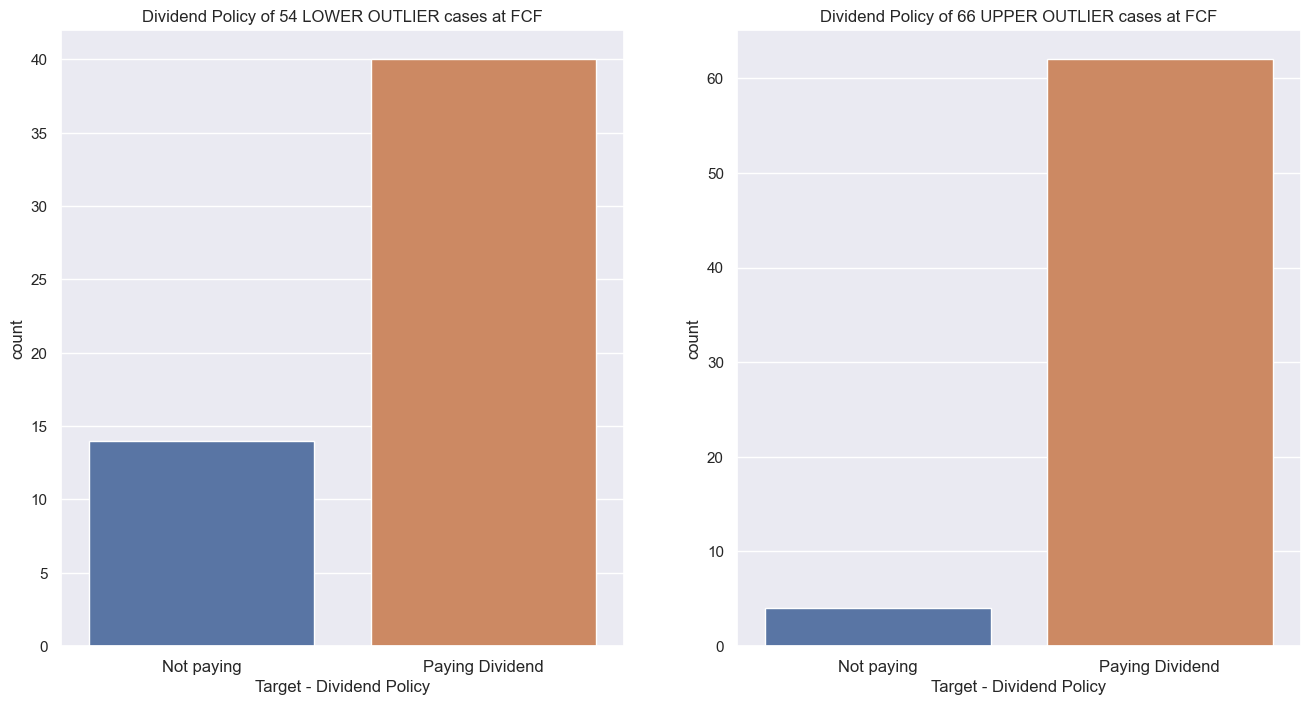

In [15]:
list_feature = list(df_feature.columns)
list_feature.remove('Target - Dividend Policy')
list_feature.remove('Dividend_in_3_latest_year')

for col in list_feature:     
        mean = df_feature[col].mean()
        sd = df_feature[col].std()
        
        lower = df_feature[(df_feature[col] < mean-(2*sd))]
        a = len(lower)

        upper = df_feature[(df_feature[col] > mean+(2*sd))]
        b = len(upper)

        

        fig, ax = plt.subplots(1,2, figsize=(16,8))

        if a >0:
                sns.countplot (x = 'Target - Dividend Policy', data = lower, ax = ax[0])
                ax[0].set_title(f'Dividend Policy of {a} LOWER OUTLIER cases at {col}', fontsize = 12)
                ax[0].set_xticks([0, 1], ['Not paying', 'Paying Dividend'], fontsize= 12)
        else:
                print('-------------------')
                print(f'There is 0 LOWER OUTLIER cases at {col}')
                print('-------------------')
        
        if b >0:
                sns.countplot (x = 'Target - Dividend Policy', data = upper, ax =ax[1])
                ax[1].set_title(f'Dividend Policy of {b} UPPER OUTLIER cases at {col}', fontsize = 12)
                ax[1].set_xticks([0, 1], ['Not paying', 'Paying Dividend'], fontsize= 12)
        else:
                print('-------------------')
                print(f'There is 0 UPPER OUTLIER cases at {col}')
                print('-------------------')

        
        plt.show()

### Save the df which will be used to train models

In [16]:
with pd.ExcelWriter("C:/Users/Tan Phuoc/Desktop/Coding Stuff/Portfolio 2023/Graduation Thesis_Dividend Forecast/Data_for_Training_Model.xlsx") as writer:
    df_feature.to_excel(writer, sheet_name= 'Input Data_Raw', index=False)


# Run Model

## Train - Test Split

In [17]:
df_raw = pd.read_excel('Data_for_Training_Model.xlsx', sheet_name= 'Input Data_Raw')

y = df_raw['Target - Dividend Policy'].copy()
X = df_raw.drop(['Target - Dividend Policy'], axis=1)

# Using SMOTE mothed to solve the imbalance class problem
smote = SMOTE()
# fit predictor and target variable
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

## Cross-Validation Training

### Set Up PipeLine for train models

In [18]:
model_scaled = {'KNN': KNeighborsClassifier(),
                'SVM': SVC() }

model_normalized = { 'LR': LogisticRegression(),
          'NB': GaussianNB(),
          'LDA': LinearDiscriminantAnalysis() }

model_no_need = { 'DT': DecisionTreeClassifier(),
             'GB': GradientBoostingClassifier(),
              'RF': RandomForestClassifier() }

scaler = { 'standard': StandardScaler(),
          'robust': RobustScaler(), 
          'minmax': MinMaxScaler() }


pipelines = []

for i in list(scaler.keys()):
    for k in list(model_scaled.keys()):
     pipelines.append((f'{k} model after {i} scaler', Pipeline([('Scaler', scaler[i]),('Model',model_scaled[k])])))

for i in list(model_normalized.keys()):
   pipelines.append((f'{i} model after normalizer', Pipeline([('Normalizer', Normalizer()),('Model',model_normalized[i])])))

for i in list(model_no_need.keys()):
   pipelines.append((f'{i} model', Pipeline([('Model',model_no_need[i])])))

### Running Cross-Validation

In [19]:
names = []

mean_test_accuracy = []
mean_train_accuracy = []
mean_test_neg_log_loss = []
mean_train_neg_log_loss = []
mean_test_roc_auc = []
mean_train_roc_auc = []

std_test_accuracy = []
std_train_accuracy = []
std_test_neg_log_loss = []
std_train_neg_log_loss = []
std_test_roc_auc = []
std_train_roc_auc = []

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

for name, model in pipelines:
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_results = cross_validate(model, X_train1, y_train1, cv=kfold, scoring=list(scoring.values()), return_train_score=True)
    #results.append(cv_results)
    names.append(name)

    mean_test_accuracy.append(cv_results['test_accuracy'].mean().round(4))
    mean_train_accuracy.append(cv_results['train_accuracy'].mean().round(4))
    mean_test_neg_log_loss.append(cv_results['test_neg_log_loss'].mean().round(4))
    mean_train_neg_log_loss.append(cv_results['train_neg_log_loss'].mean().round(4))
    mean_test_roc_auc.append(cv_results['test_roc_auc'].mean().round(4))
    mean_train_roc_auc.append(cv_results['train_roc_auc'].mean().round(4))

    std_test_accuracy.append(cv_results['test_accuracy'].std().round(4))
    std_train_accuracy.append(cv_results['train_accuracy'].std().round(4))
    std_test_neg_log_loss.append(cv_results['test_neg_log_loss'].std().round(4))
    std_train_neg_log_loss.append(cv_results['train_neg_log_loss'].std().round(4))
    std_test_roc_auc.append(cv_results['test_roc_auc'].std().round(4))
    std_train_roc_auc.append(cv_results['train_roc_auc'].std().round(4))

### Cross-Validation Result

In [20]:
cross_val_result = pd.DataFrame({'Running model on df_raw': names,
                                 'Mean test accuracy': mean_test_accuracy,
                                 'Mean train accuracy': mean_train_accuracy,
                                 'Mean test negative log loss': mean_test_neg_log_loss,
                                 'Mean train  negative log loss': mean_train_neg_log_loss,
                                 'Mean test ROC-AUC': mean_test_roc_auc,
                                 'Mean train ROC-AUC': mean_train_roc_auc,  
                                 'std test accuracy': std_test_accuracy,
                                 'std train accuracy': std_train_accuracy,
                                 'std test negative log loss': std_test_neg_log_loss,
                                 'std train  negative log loss': std_train_neg_log_loss,
                                 'std test ROC-AUC': std_test_roc_auc,
                                 'std train ROC-AUC': std_train_roc_auc,})
cross_val_result

,Running model on df_raw,Mean test accuracy,Mean train accuracy,Mean test negative log loss,Mean train negative log loss,Mean test ROC-AUC,Mean train ROC-AUC,std test accuracy,std train accuracy,std test negative log loss,std train negative log loss,std test ROC-AUC,std train ROC-AUC
0,KNN model after standard scaler,0.8565,0.9048,-1.1338,-0.2037,0.9246,0.9716,0.0088,0.0016,0.1438,0.0019,0.0063,0.0006
1,SVM model after standard scaler,0.8309,0.8363,NaN,NaN,0.9179,0.9226,0.0090,0.0015,NaN,NaN,0.0067,0.0008
2,KNN model after robust scaler,0.8275,0.8921,-1.1729,-0.2420,0.8995,0.9612,0.0101,0.0016,0.1608,0.0017,0.0083,0.0006
3,SVM model after robust scaler,0.5020,0.5025,NaN,NaN,0.5309,0.5386,0.0015,0.0002,NaN,NaN,0.0838,0.0860
4,KNN model after minmax scaler,0.8311,0.8830,-1.5126,-0.2409,0.8983,0.9590,0.0084,0.0021,0.1732,0.0038,0.0070,0.0012
5,SVM model after minmax scaler,0.8059,0.8064,NaN,NaN,0.8999,0.9007,0.0115,0.0016,NaN,NaN,0.0078,0.0024
6,LR model after normalizer,0.7165,0.7170,-0.5547,-0.5544,0.7726,0.7729,0.0136,0.0016,0.0140,0.0016,0.0141,0.0016
7,NB model after normalizer,0.6950,0.6951,-0.9494,-0.9390,0.7901,0.7911,0.0132,0.0017,0.0897,0.0283,0.0162,0.0019
8,LDA model after normalizer,0.7324,0.7324,-0.5274,-0.5265,0.8049,0.8055,0.0134,0.0017,0.0152,0.0016,0.0128,0.0014
9,DT model,0.8654,1.0000,-4.8503,-0.0000,0.8654,1.0000,0.0083,0.0000,0.3001,0.0000,0.0083,0.0000


### As we can see from the table of cross validation result. 
### In the view of scorinng, RF and GB with all kinds of scaler have the best performance (highest negative mean squared error). 
### In the view of standard deviation, they are SVC with robust scaler, Naive Bayes with 3 kinds of scaler have low standard deviation . However all of them have the lowest negative mean squared error.
### While the standard deviation of RF and GB which have good scoring are only higher than these 4 below model a little bit. Thus, I would rather more dive deep to training data with RF and GB model

## Traditional models (Logistic Model & Linear Discriminants Analysis) VS best models (Gradient Boosting & Random Forest)

In [21]:
chosen_list = [6,8,10,11]
chosen_pipelines = []
for i in chosen_list:
    chosen_pipelines.append(pipelines[i])

### About using LR and LDA models to predict on test set. Because using Normalizer in Pipeline, we have only normalized the X_train1, the models learnt on the normalized data. Hence we would need to normarlize the X-test1 as well before using the models to predict

In [37]:
X_train1['class'] = 'train'
X_test1['class'] = 'test'
X_concat = pd.concat([X_train1, X_test1])

X_normalize = pd.DataFrame(Normalizer().fit_transform(X_concat.iloc[:,:-1]))
X_normalize['class'] = list(X_concat['class'])
X_normalize.columns = X_concat.columns

X_norm_train = X_normalize.loc[X_normalize['class']== 'train']
X_norm_test = X_normalize.loc[X_normalize['class']== 'test']

X_train1.drop(columns='class', inplace= True)
X_test1.drop(columns='class', inplace= True)
X_norm_train.drop(columns='class', inplace= True)
X_norm_test.drop(columns='class', inplace= True)

X_norm_train['Dividend_in_3_latest_year'] = X_train1['Dividend_in_3_latest_year']
X_norm_test['Dividend_in_3_latest_year'] = list(X_test1['Dividend_in_3_latest_year'])

In [38]:
X_norm_test['Dividend_in_3_latest_year']

11308    0
11309    1
11310    1
11311    1
11312    1
        ..
13141    1
13142    1
13143    1
13144    1
13145    1
Name: Dividend_in_3_latest_year, Length: 1838, dtype: int64

### Model Evaluation


In [39]:
accuracy=[]
presion=[]
recall=[]
f1_scoring=[]
roc_auc= []
model_names=[]
fitted_model = []
y_pred1_list =[]
y_pred_proba1_list = []

for i in range(0,2):
    train_model = chosen_pipelines[i][1]
    train_model.fit(X_train1, y_train1)
    y_pred1 = train_model.predict(X_norm_test)
    y_pred_proba1 = train_model.predict_proba(X_norm_test)

    fitted_model.append(train_model)
    y_pred1_list.append(y_pred1)
    y_pred_proba1_list.append(y_pred_proba1)

    accuracy.append(accuracy_score(y_test1, y_pred1))
    presion.append(precision_score(y_test1, y_pred1))
    recall.append(recall_score(y_test1, y_pred1))
    f1_scoring.append(f1_score(y_test1, y_pred1))
    roc_auc.append(roc_auc_score(y_test1, y_pred1))
    model_names.append(chosen_pipelines[i][0])

for i in range(2,4):
    train_model = chosen_pipelines[i][1]
    train_model.fit(X_train1, y_train1)
    y_pred1 = train_model.predict(X_test1)
    y_pred_proba1 = train_model.predict_proba(X_test1)

    fitted_model.append(train_model)
    y_pred1_list.append(y_pred1)
    y_pred_proba1_list.append(y_pred_proba1)

    accuracy.append(accuracy_score(y_test1, y_pred1))
    presion.append(precision_score(y_test1, y_pred1))
    recall.append(recall_score(y_test1, y_pred1))
    f1_scoring.append(f1_score(y_test1, y_pred1))
    roc_auc.append(roc_auc_score(y_test1, y_pred1))
    model_names.append(chosen_pipelines[i][0])

model_evaluation1 = pd.DataFrame({'Predicting on df_raw': model_names,
                                 'accuracy': accuracy,
                                 'precision': presion,
                                 'recall': recall,
                                 'f1_score': f1_scoring,
                                 'ROC_AUC score': roc_auc})
model_evaluation1    

,Predicting on df_raw,accuracy,precision,recall,f1_score,ROC_AUC score
0,LR model after normalizer,0.730686,0.899317,0.736548,0.809835,0.723311
1,LDA model after normalizer,0.832971,0.847342,0.958071,0.899311,0.675596
2,GB model,0.854189,0.918045,0.892383,0.905032,0.806142
3,RF model,0.868879,0.922585,0.907757,0.915111,0.819972


### Classification Report

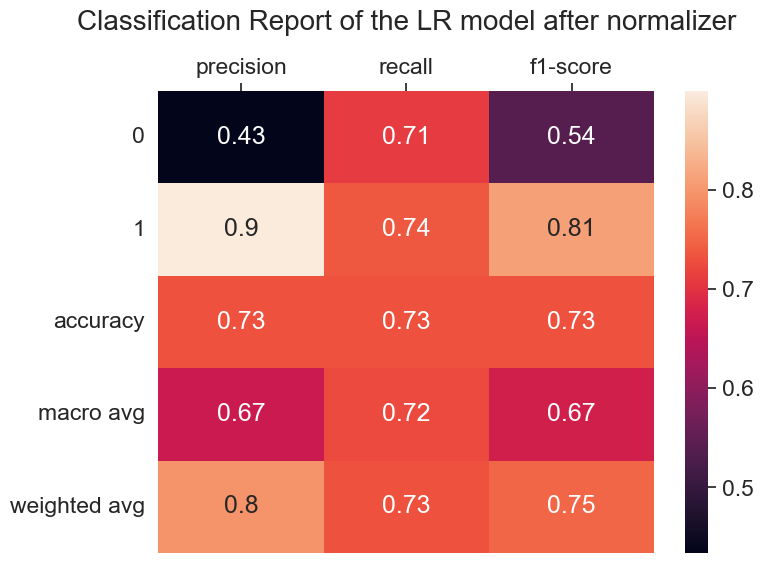

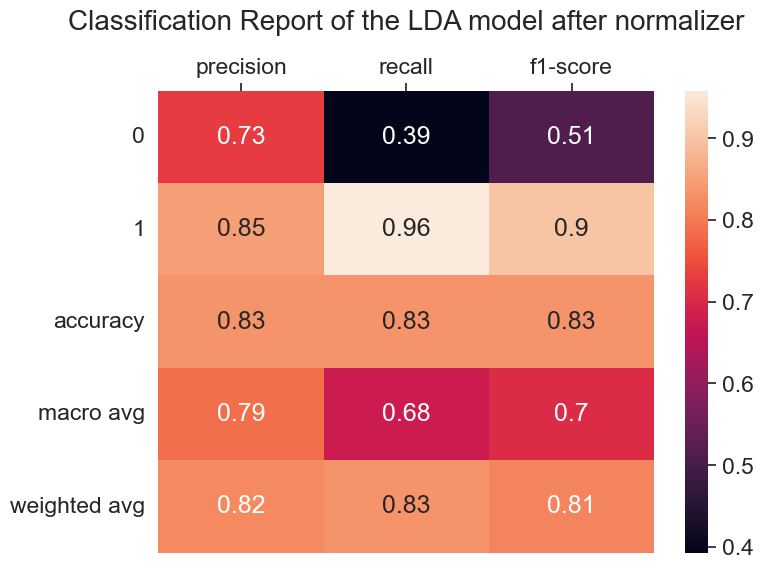

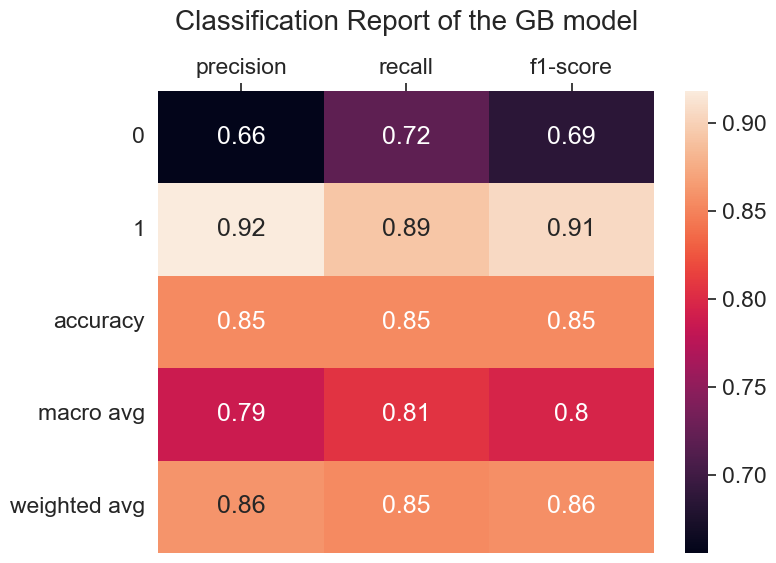

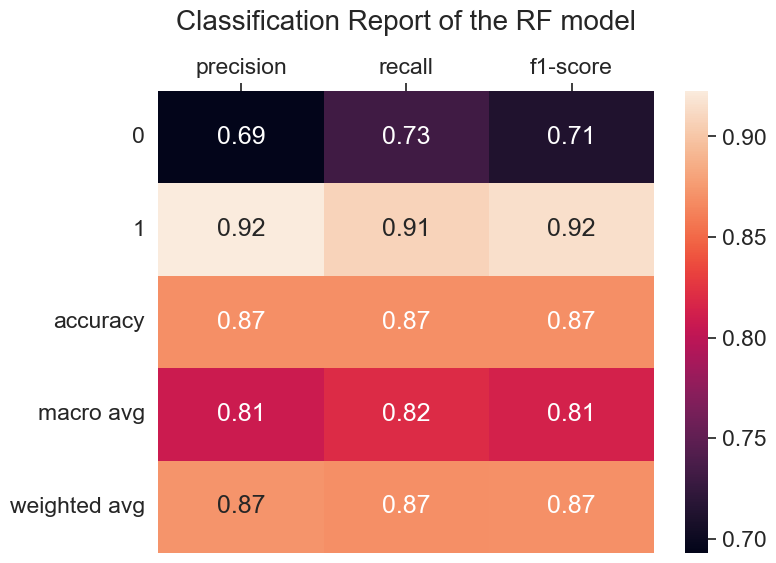

In [40]:
for i in range(0,4):
    rf_report = classification_report(y_test1, y_pred1_list[i], output_dict=True)
    
    # Change figure size and increase dpi for better resolution
    plt.figure(figsize=(8,6))
    # Scale up the size of all text
    sns.set(font_scale = 1.5)

    # Plot Classification Report using Seaborn heatmap()
    ax = sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True)
    # Move xticks to the top of graph
    ax.xaxis.tick_top()
    # Set the tittles
    ax.set_title(f"Classification Report of the {model_names[i]}", fontsize=20, pad=20)



### Confusion Matrix

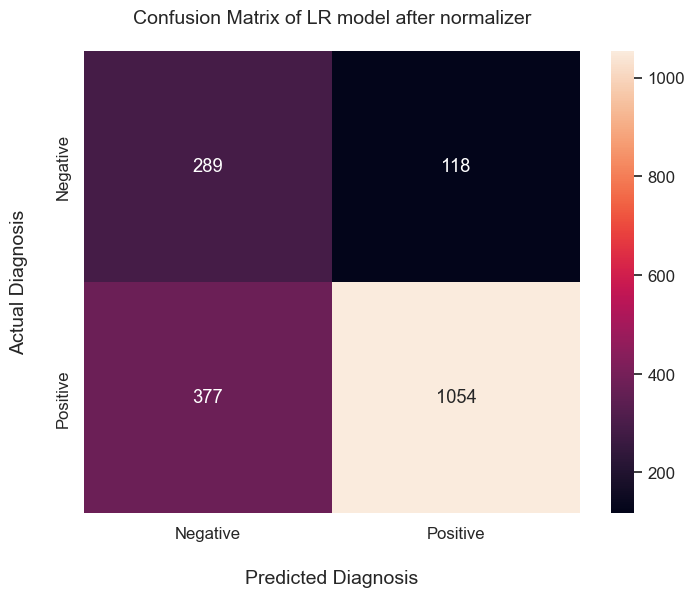

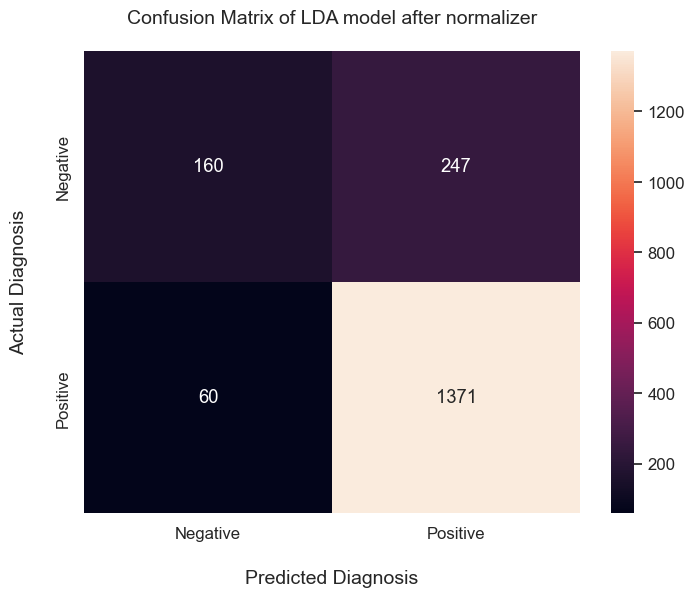

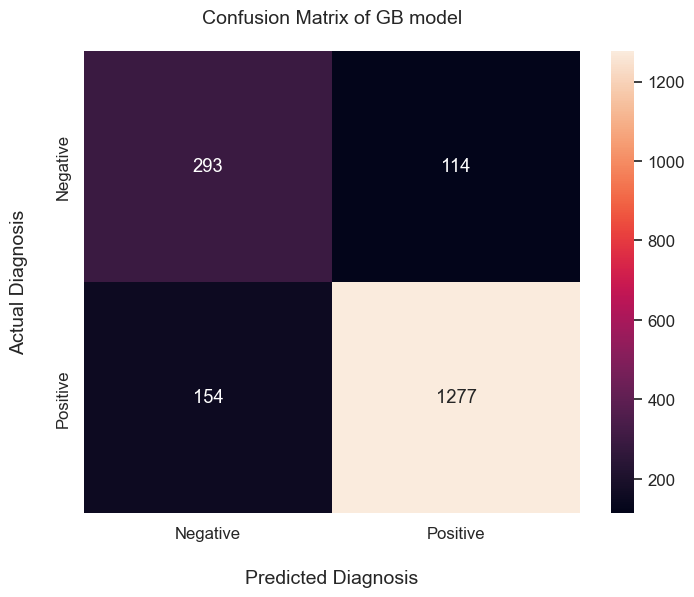

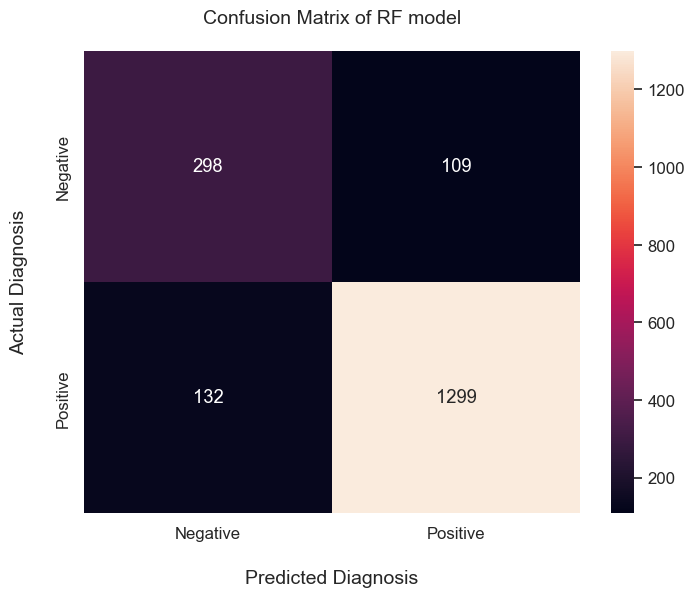

In [41]:
for i in range(0,4):
    # Change figure size and increase dpi for better resolution
    plt.figure(figsize=(8,6), dpi=100)
    # Scale up the size of all text
    sns.set(font_scale = 1.1)

    # Plot Confusion Matrix using Seaborn heatmap()
    # Parameters:
    # first param - confusion matrix in array format   
    # annot = True: show the numbers in each heatmap cell
    # fmt = 'd': show numbers as integers. 
    ax = sns.heatmap(confusion_matrix(y_test1, y_pred1_list[i]), annot=True, fmt='d', )

    # set x-axis label and ticks. 
    ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])

    # set y-axis label and ticks
    ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])

    # set plot title
    ax.set_title(f"Confusion Matrix of {model_names[i]}", fontsize=14, pad=20)

    plt.show()

### Plot ROC-AUC

In [42]:
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

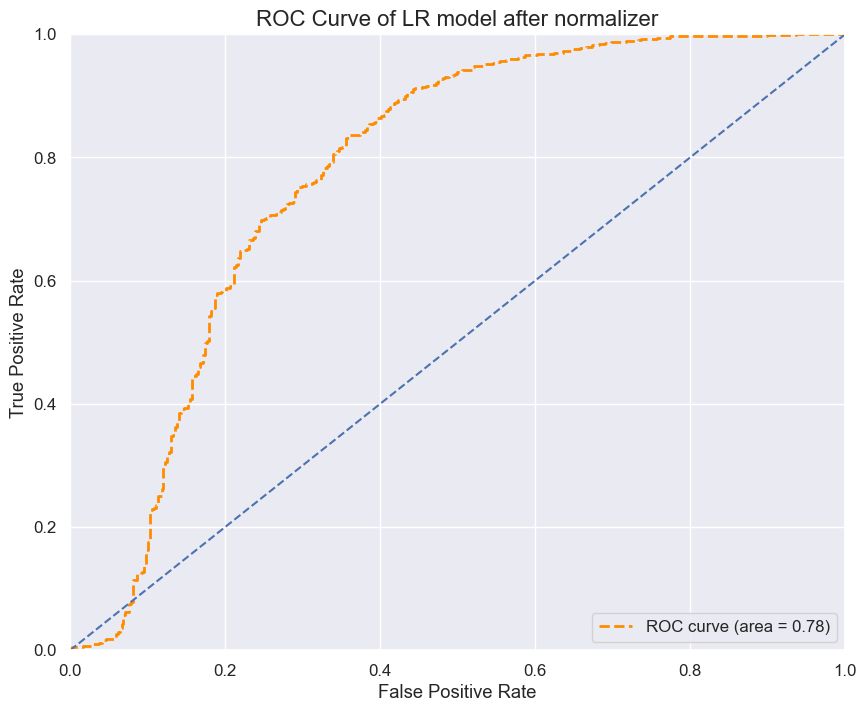

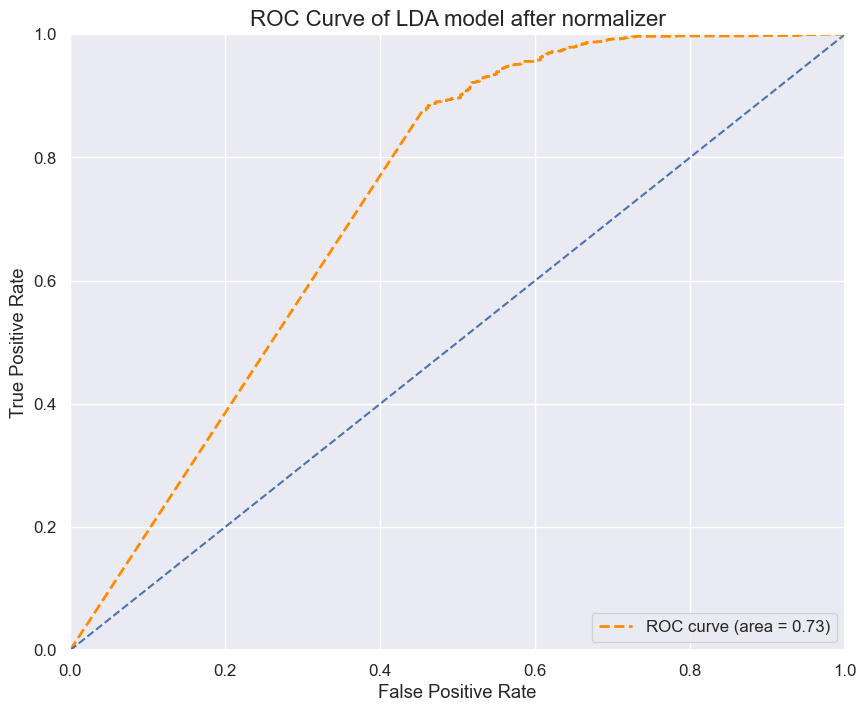

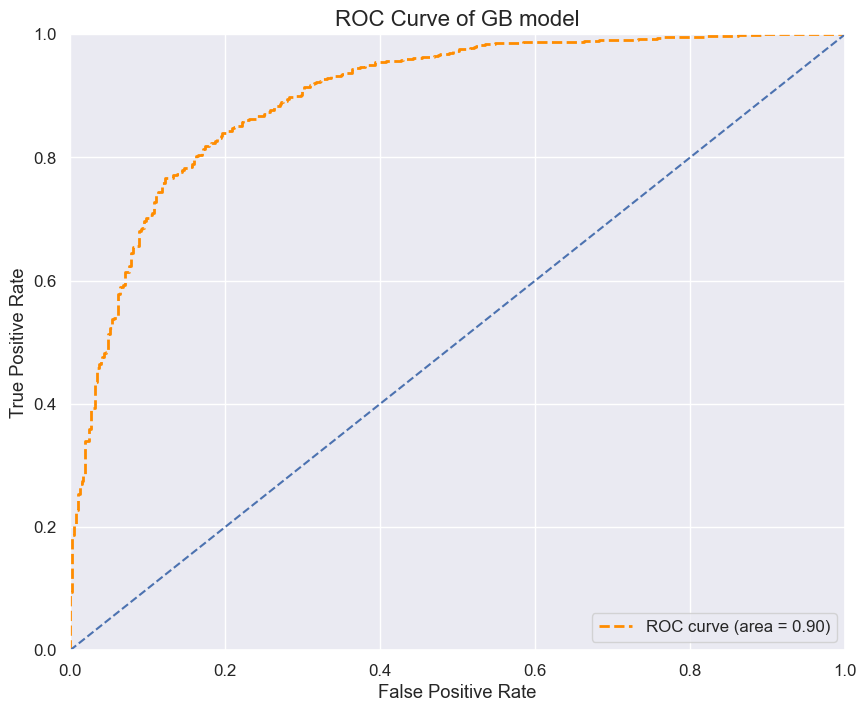

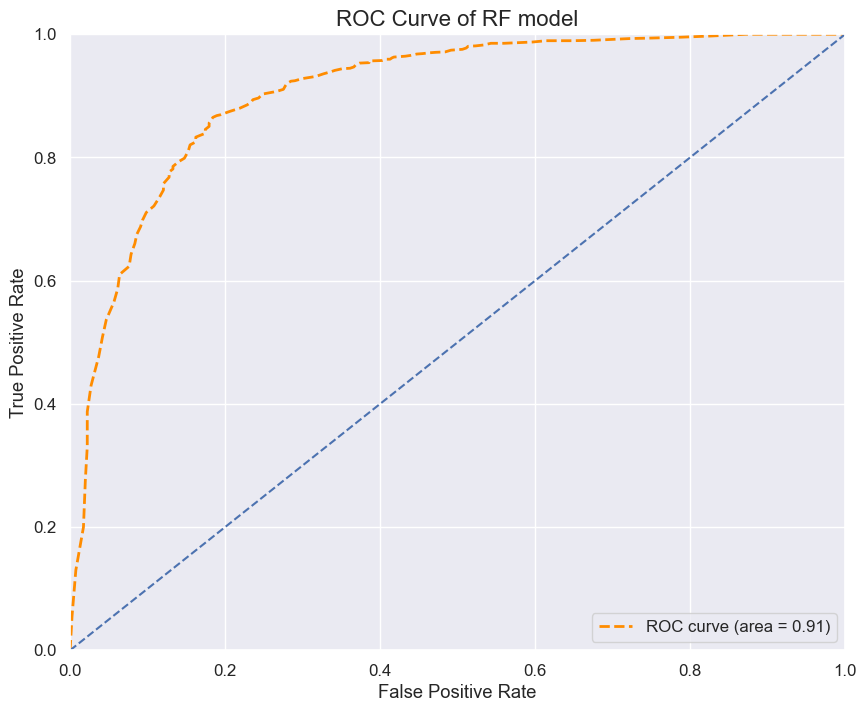

In [43]:
for i in range(0,4):
    # predict_proba is showw the probabilitíe the model will predict 1 case to each label in target variable
    y_pred1_prob_test = y_pred_proba1_list[i][:, 1]
    fpr, tpr, thres = roc_curve(y_test1, y_pred1_prob_test)
    roc_auc = auc(fpr, tpr)

    _plot_roc_curve(fpr, tpr, thres, roc_auc)
    plt.title(f'ROC Curve of {model_names[i]}', fontsize=16)

### Feature Imporatances

                                FeatureName  Feature Importance
0                                      Size           -0.000000
1                             Current Ratio           -0.000000
2                                       ROA            0.000000
3                                       ROE            0.000000
4                            Debt on Equity           -0.000000
5                         Net profit margin            0.000000
6                              Cost of debt           -0.000000
7                                      BVPS            0.000000
8                       Price on Book Value           -0.000159
9                              Price on EPS           -0.046321
10   Price on Operating Cash flow per Share           -0.004530
11                Operating cash flow ratio            0.000000
12                     Time interest earned            0.102103
13  Retained Earnings (Accumulated Deficit)            1.562241
14            Cumulative Net Change in C

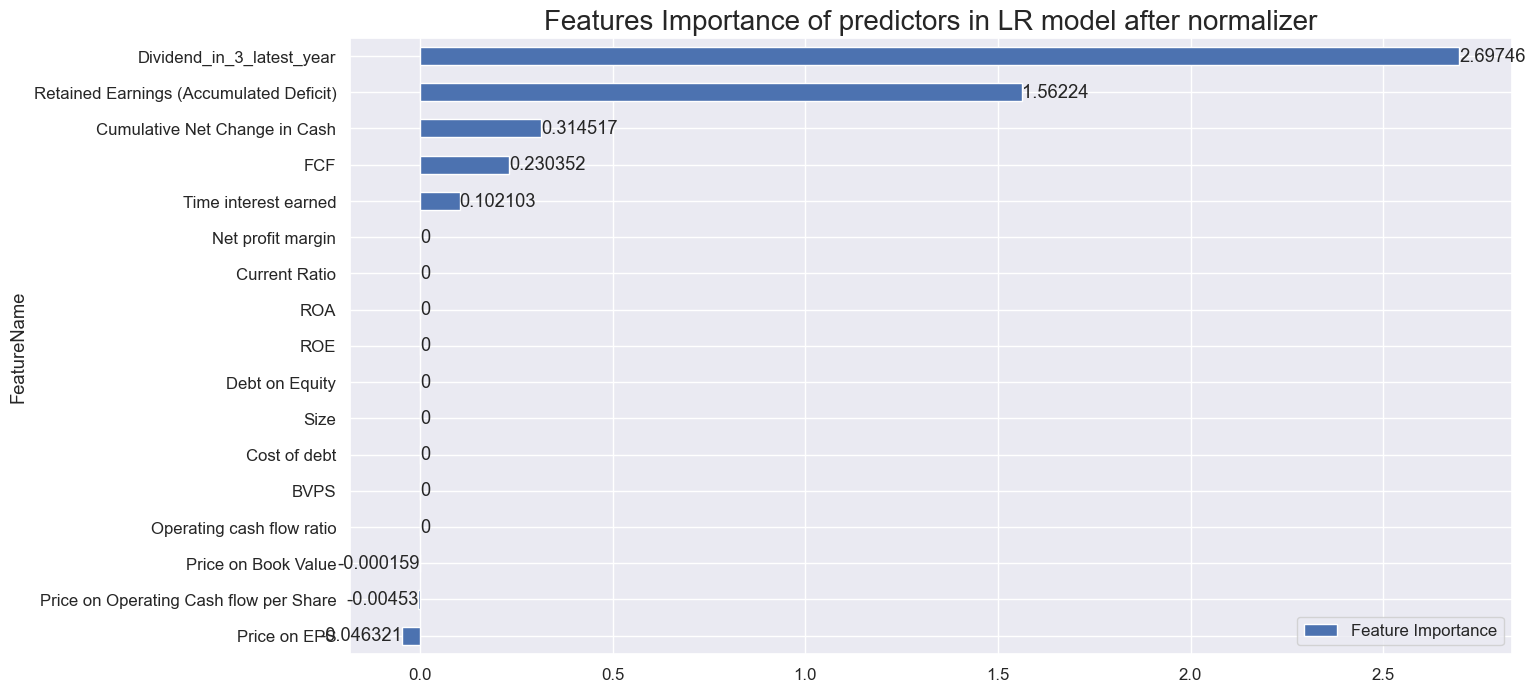

                                FeatureName  Feature Importance
0                                      Size       -3.342566e+08
1                             Current Ratio       -8.045971e+07
2                                       ROA        4.213390e+10
3                                       ROE        2.200003e+09
4                            Debt on Equity       -1.527658e+08
5                         Net profit margin        3.514798e+08
6                              Cost of debt       -2.404794e+08
7                                      BVPS        6.895869e+09
8                       Price on Book Value       -3.024962e+04
9                              Price on EPS       -9.330670e+02
10   Price on Operating Cash flow per Share       -6.254109e+02
11                Operating cash flow ratio       -9.135284e+07
12                     Time interest earned        5.833943e+00
13  Retained Earnings (Accumulated Deficit)        1.439398e+00
14            Cumulative Net Change in C

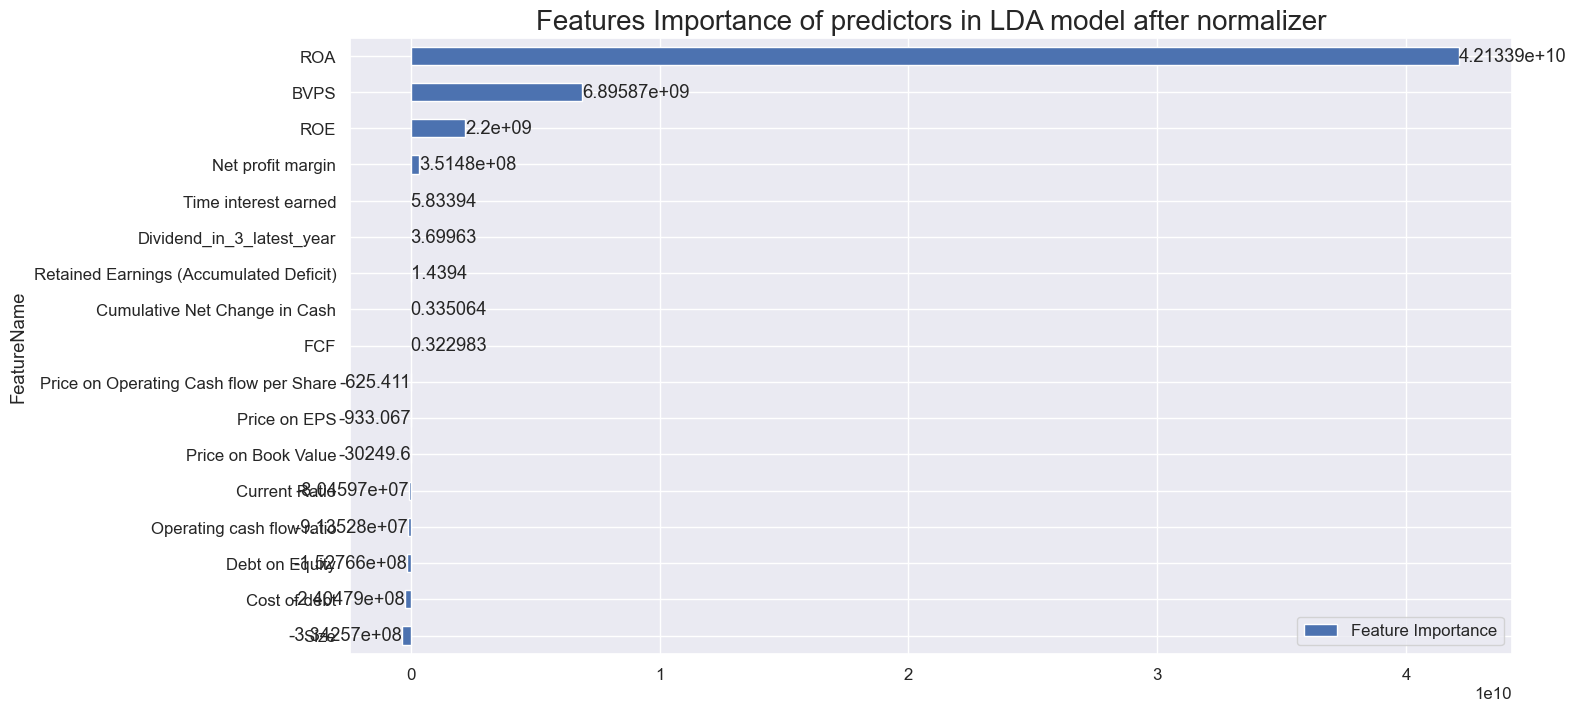

In [44]:
for i in range (0,2):
    fit = fitted_model[i]['Model'].fit(X_norm_train, y_train1)
    importance_feature = fit.coef_[0]
    features_importances_rf = pd.DataFrame({'FeatureName': list(df_raw.columns)[0:-1], 'Feature Importance': importance_feature.round(6)})
    print(features_importances_rf)
    features_importances_plot = features_importances_rf.sort_values(by=['Feature Importance']).plot(figsize=(15,8), x="FeatureName", y=["Feature Importance"], kind="barh")
    plt.bar_label(features_importances_plot.containers[0] )
    plt.title(f'Features Importance of predictors in {model_names[i]}', fontsize = 20)
    plt.show()

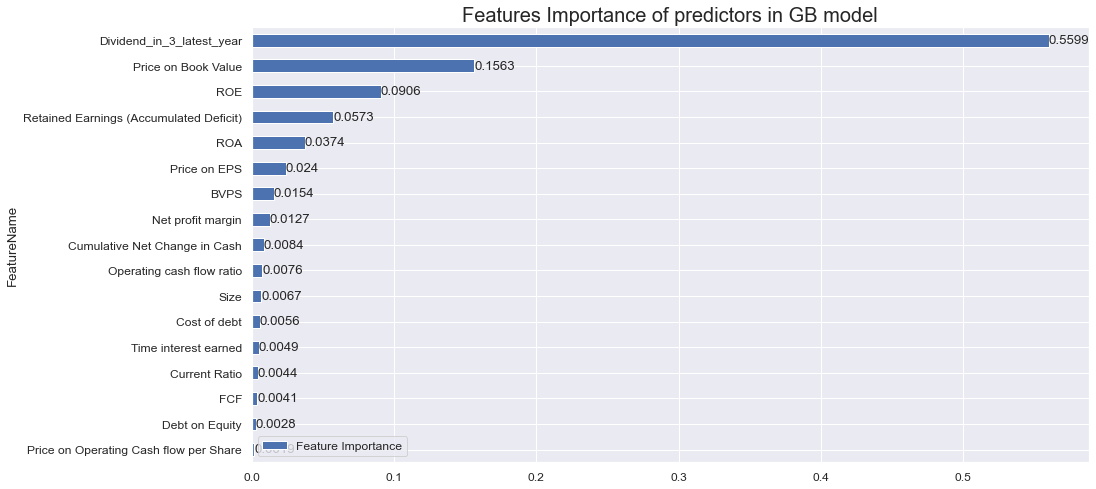

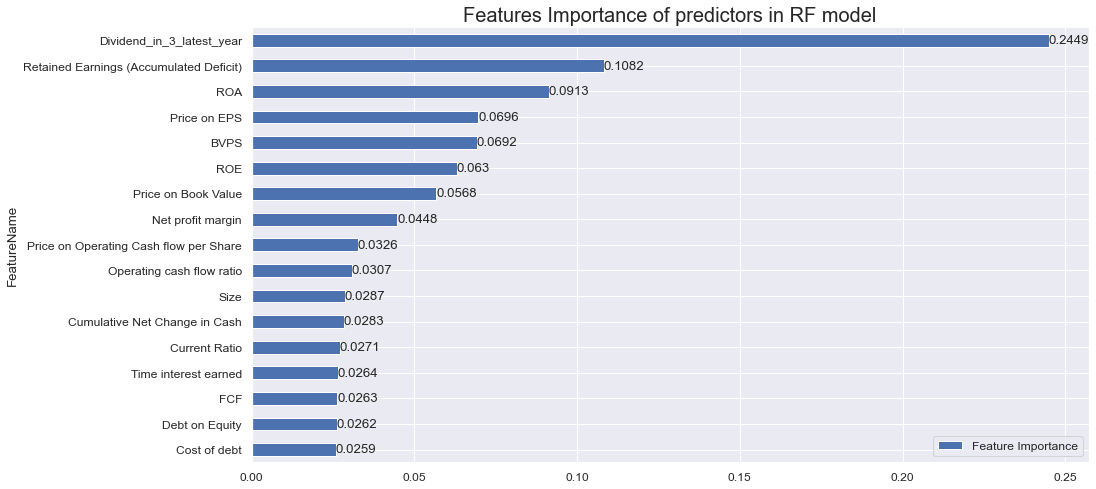

In [ ]:
for i in range (2,4):
    importance_feature = fitted_model[i]['Model'].feature_importances_
    features_importances_rf = pd.DataFrame({'FeatureName': list(df_raw.columns)[0:-1], 'Feature Importance': importance_feature.round(4)})
    features_importances_plot = features_importances_rf.sort_values(by=['Feature Importance']).plot(figsize=(15,8), x="FeatureName", y=["Feature Importance"], kind="barh")
    plt.bar_label(features_importances_plot.containers[0])
    plt.title(f'Features Importance of predictors in {model_names[i]}', fontsize = 20)
    plt.show()

## Hyperparameter Tuning Random Forest models

### Random SearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
max_features.append(None)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [4, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [4, 10, 20], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = fitted_model[3]['Model'], param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train1, y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [4, 10, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [ ]:
best_random = rf_random.best_estimator_
RF_best_random_y_test_pred = best_random.predict(X_test1)

In [ ]:
rf_saving = RandomForestClassifier(n_estimators= 500,
 min_samples_split= 4,
 min_samples_leaf= 1,
 max_features= "sqrt",
 max_depth= None,
 bootstrap= False)

rf_saving.fit(X_train1, y_train1)
RF_best_random_y_test_pred = rf_saving.predict(X_test1)
RF_best_random_y_test_pred_proba1 = rf_saving.predict_proba(X_test1)

Text(0.5, 1.0, 'Classification Report of the RF Model (RandomSearchCV)')

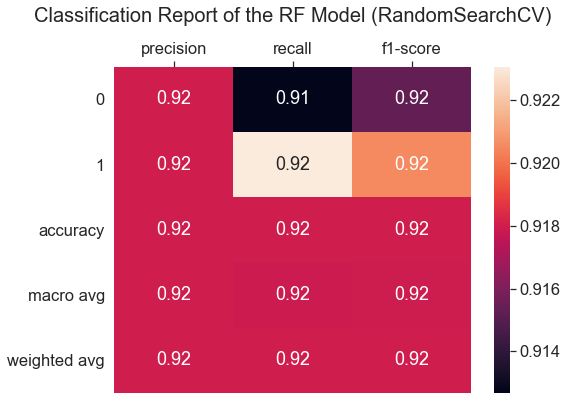

In [ ]:
rf_best_random_report = classification_report(y_test1, RF_best_random_y_test_pred, output_dict=True)

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6))
# Scale up the size of all text
sns.set(font_scale = 1.5)

# Plot Classification Report using Seaborn heatmap()
ax = sns.heatmap(pd.DataFrame(rf_best_random_report).iloc[:-1, :].T, annot=True)
# Move xticks to the top of graph
ax.xaxis.tick_top()
# Set the tittles
ax.set_title("Classification Report of the RF Model (RandomSearchCV)", fontsize=20, pad=20)

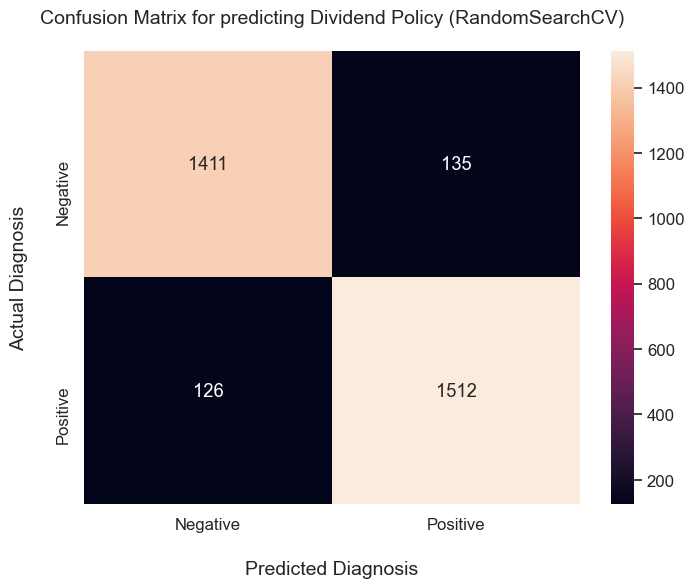

In [ ]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(confusion_matrix(y_test1, RF_best_random_y_test_pred), annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for predicting Dividend Policy (RandomSearchCV)", fontsize=14, pad=20)

plt.show()